In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib import style
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
train_df = pd.read_csv(r"C:\Users\anvesh.singh\Desktop\train.csv")

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.shape

(1460, 81)

In [5]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
nan_values = [x for x in train_df.columns if train_df[x].isnull().sum()>1]

In [8]:
pd.DataFrame(nan_values)

,0
0,LotFrontage
1,Alley
2,MasVnrType
3,MasVnrArea
4,BsmtQual
5,BsmtCond
6,BsmtExposure
7,BsmtFinType1
8,BsmtFinType2
9,FireplaceQu


In [9]:
test_df = pd.read_csv(r"C:\Users\anvesh.singh\Desktop\test.csv")
test_df.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
cols = train_df.columns
num_cols = train_df._get_numeric_data()
num_cols

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [11]:
categorical_cols = train_df.select_dtypes(exclude=["number","bool_"])
categorical_cols

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [12]:
train_df['Alley'].isnull().sum()

1369

In [13]:
# for x in categorical_cols:
#     sns.countplot(x = categorical_cols, data = categorical_cols)
#     plt.show

<Axes: >

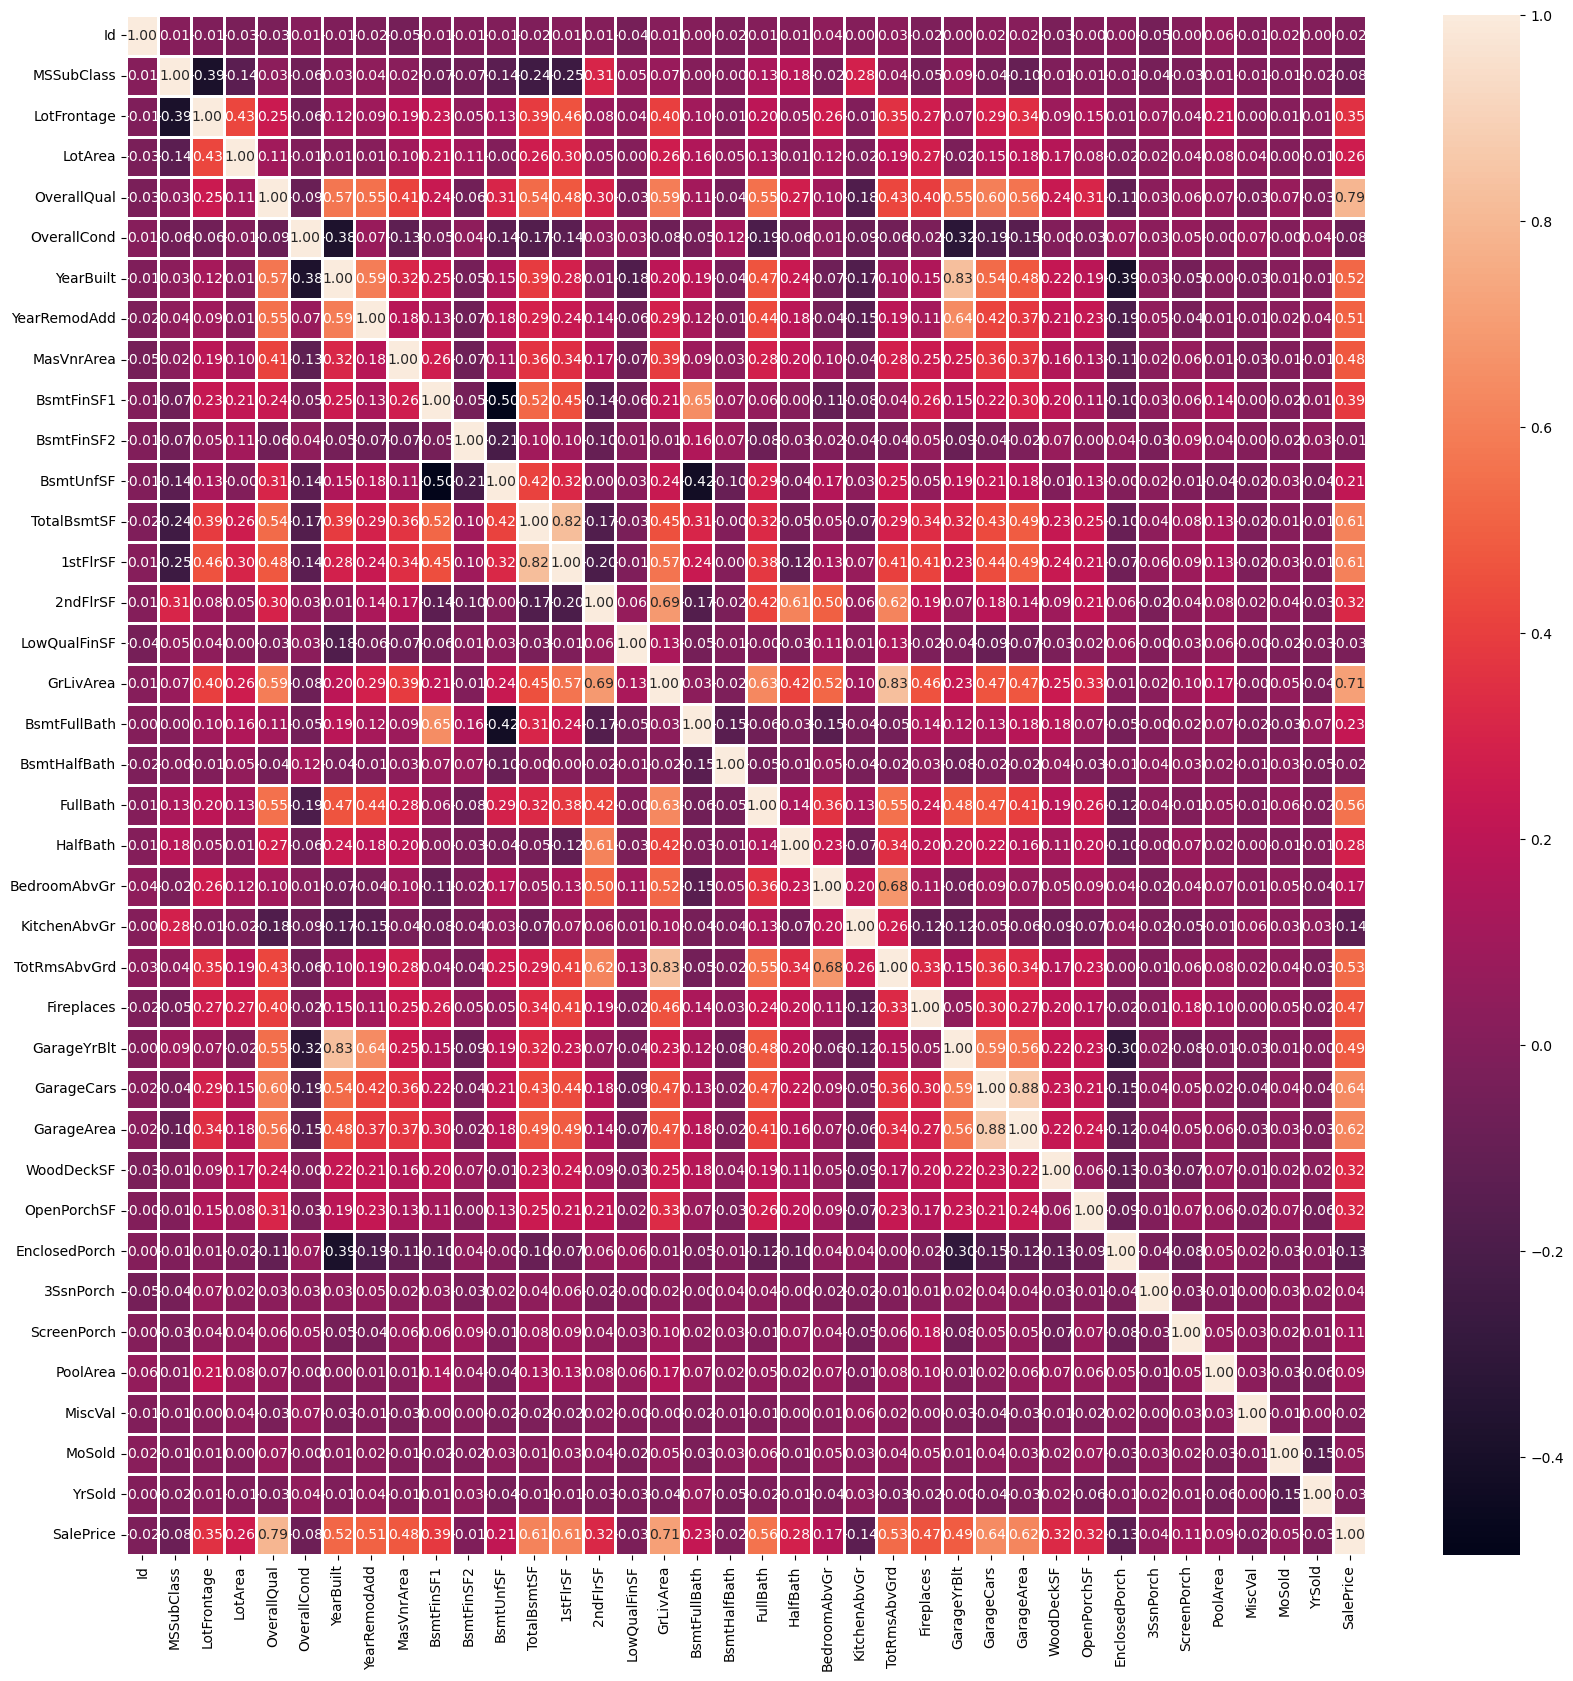

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(num_cols.corr(),
            #cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

C:\Users\anvesh.singh\AppData\Local\Temp\ipykernel_588\468551266.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(16, 8, index)
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is dep

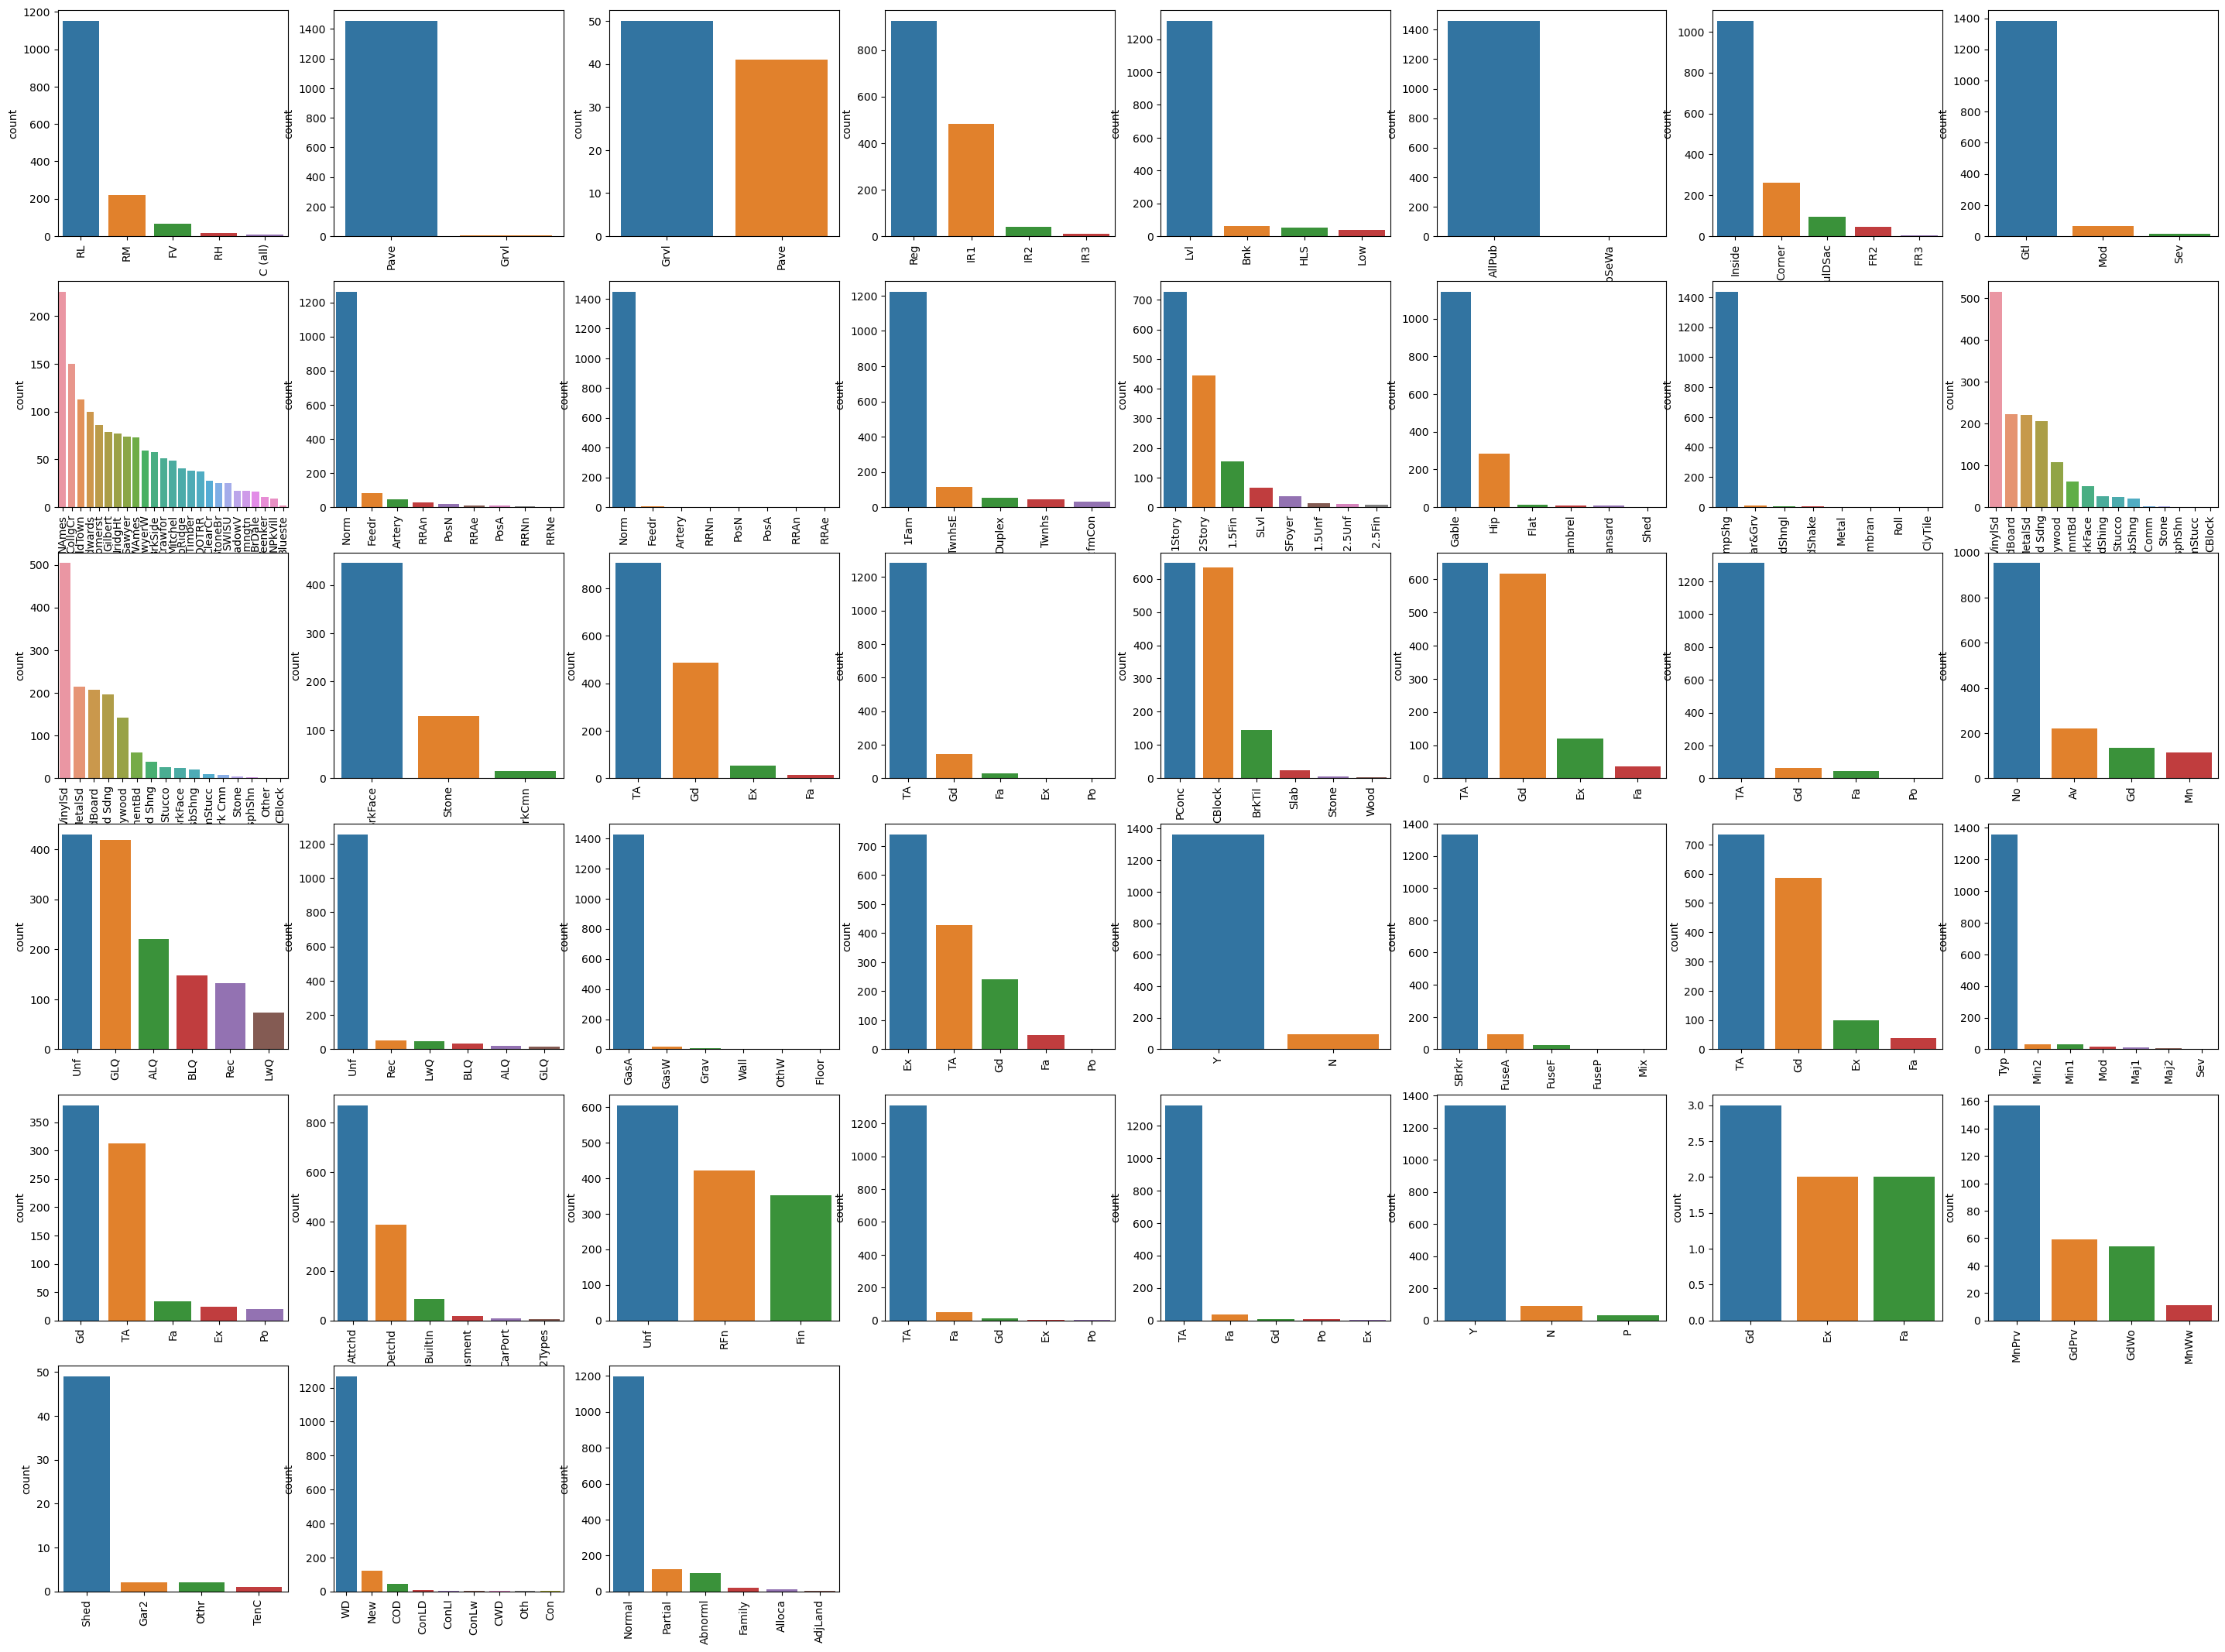

In [15]:
plt.figure(figsize=(36, 72))
plt.xticks(rotation=90)
index = 1

for col in categorical_cols:
    y = train_df[col].value_counts()
    plt.subplot(16, 8, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1



In [16]:
list(categorical_cols)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [17]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [18]:
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [19]:
train_df['Exterior1st'].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [20]:
train_df['Exterior1st'].shape

(1460,)

In [21]:
train_df['Exterior2nd'].shape

(1460,)

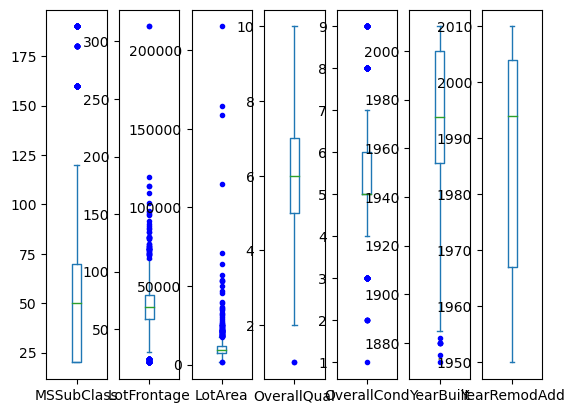

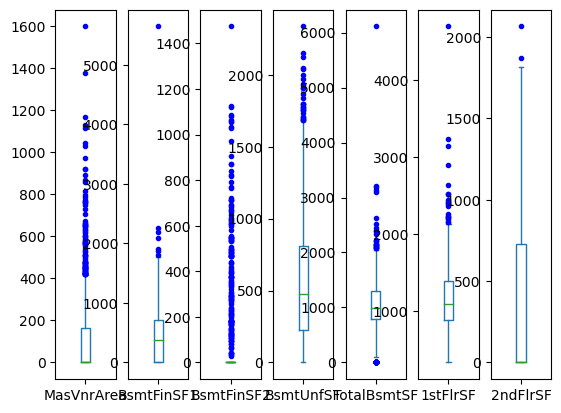

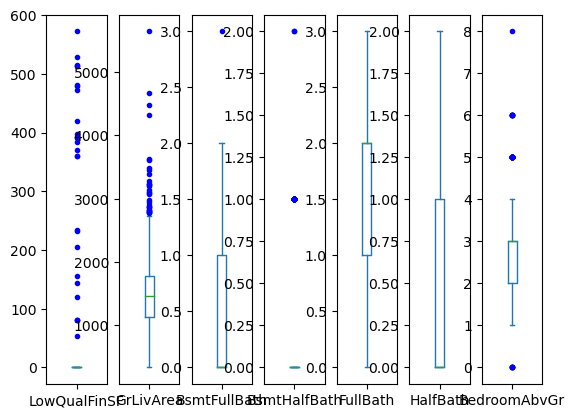

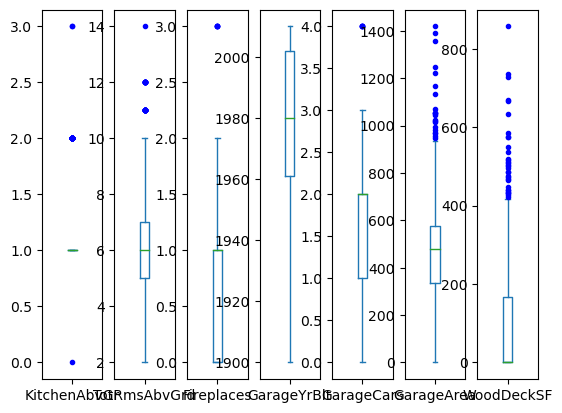

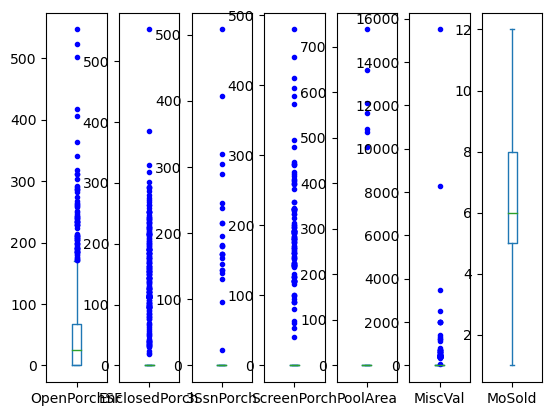

In [22]:
df_1 = num_cols.iloc[:, 1:-1]

n_rows = 5
col_start = 0
delta = 7
col_end = 0


for i in range(n_rows):
    col_end = col_start + delta
    df_1.iloc[:, col_start:col_end].plot(kind = 'box', subplots=True, sym='b.')
    col_start += delta

plt.show()


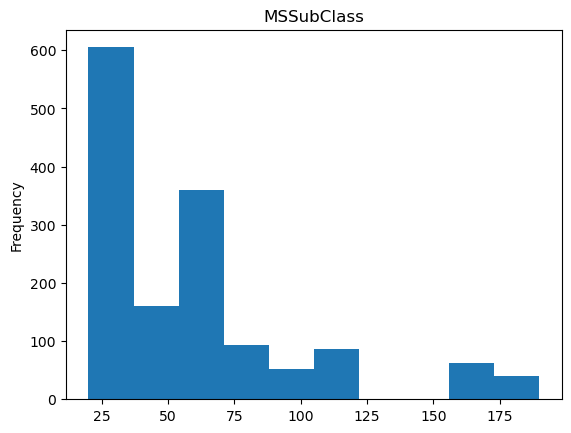

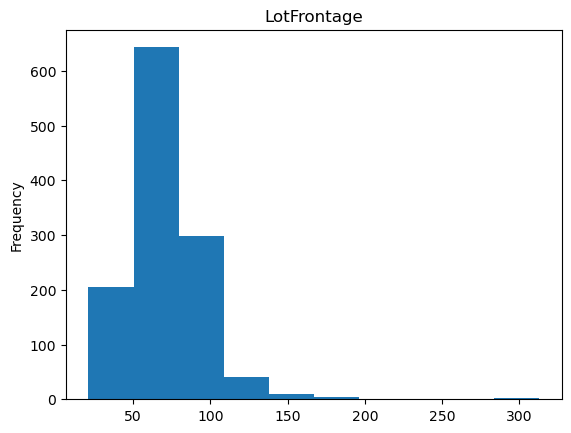

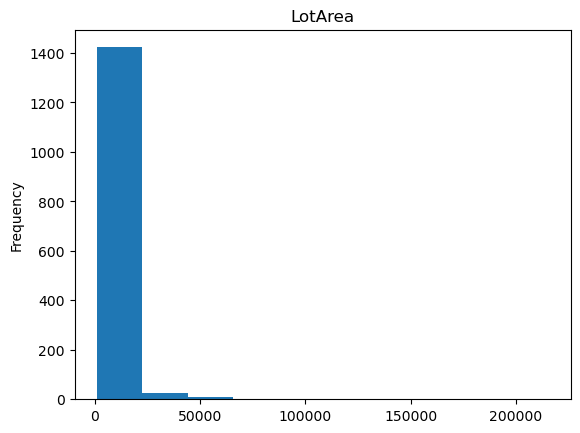

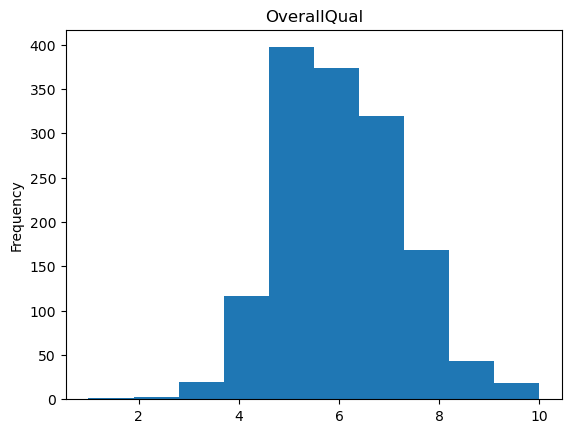

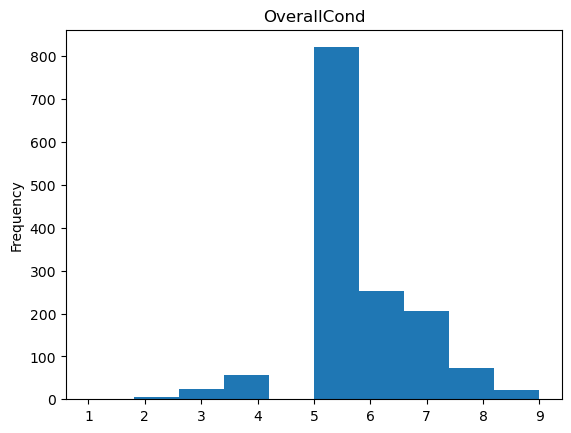

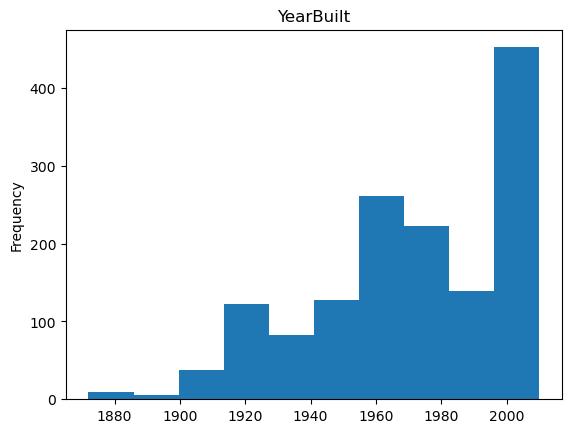

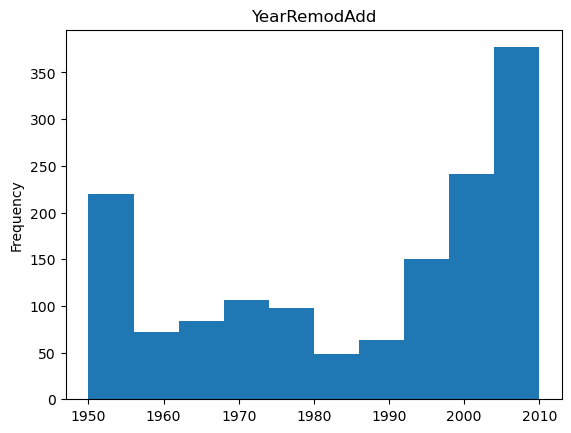

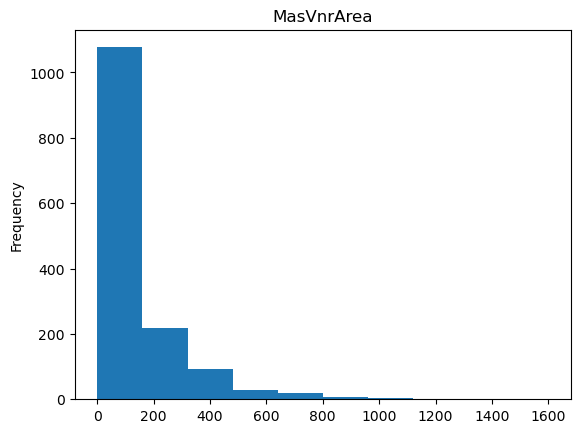

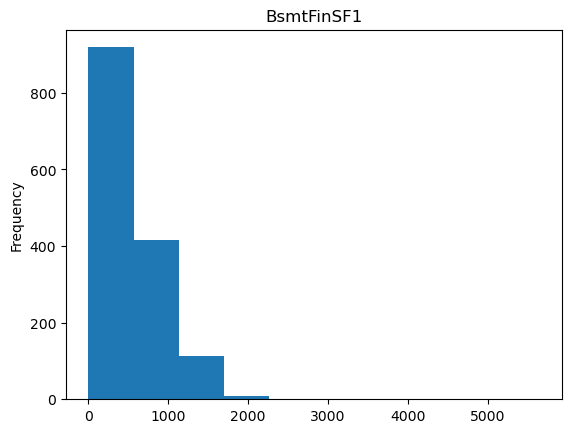

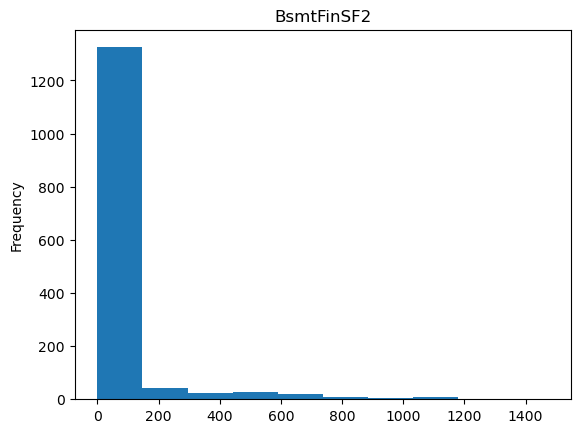

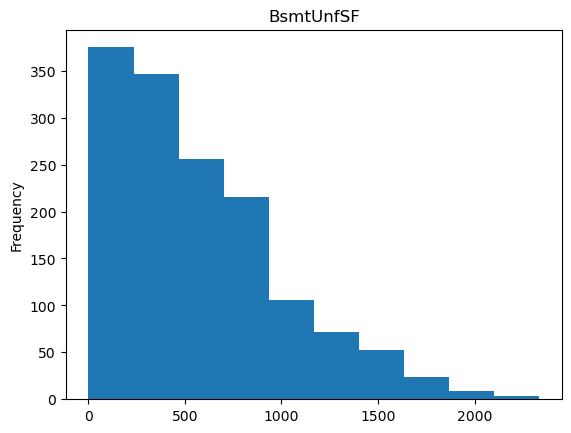

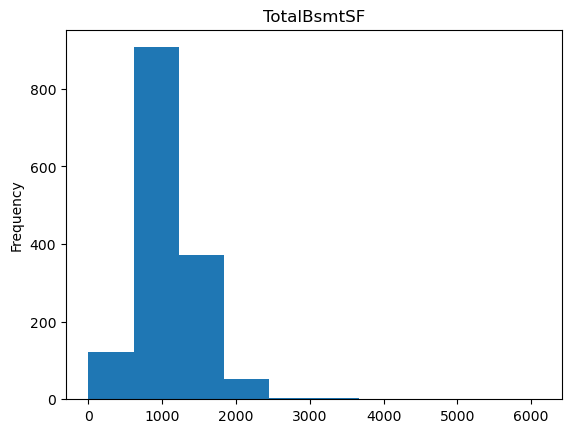

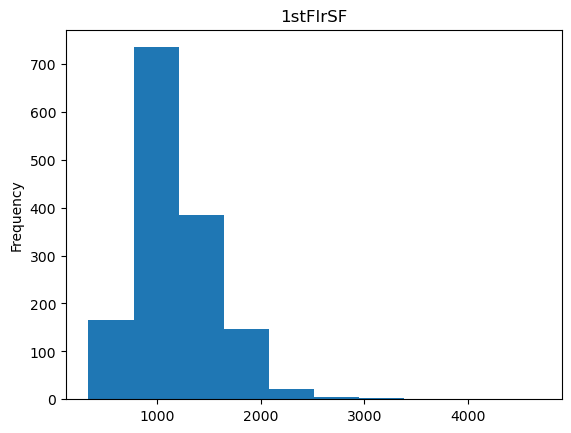

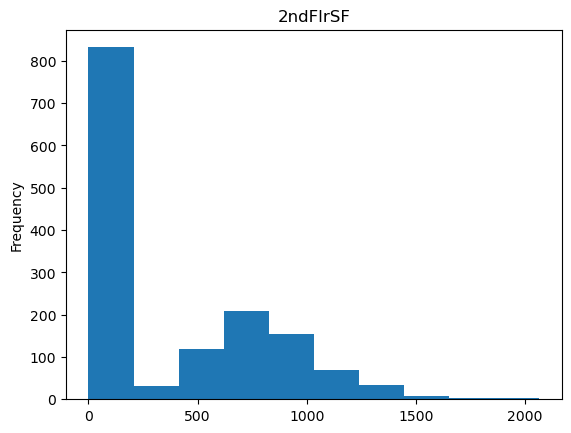

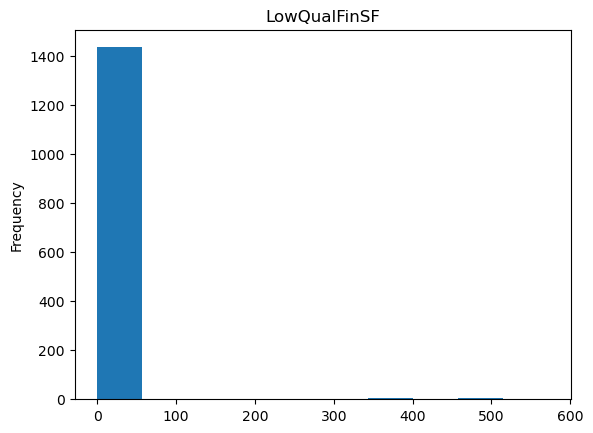

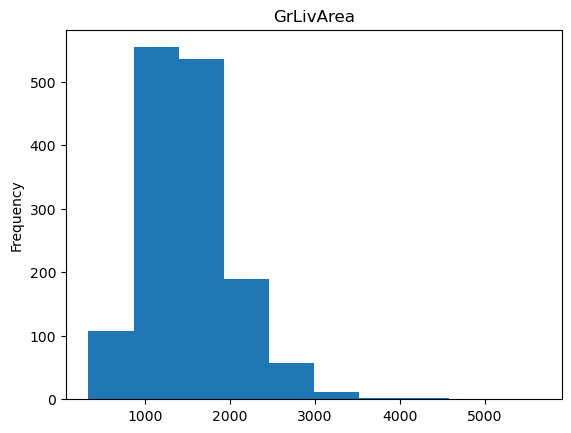

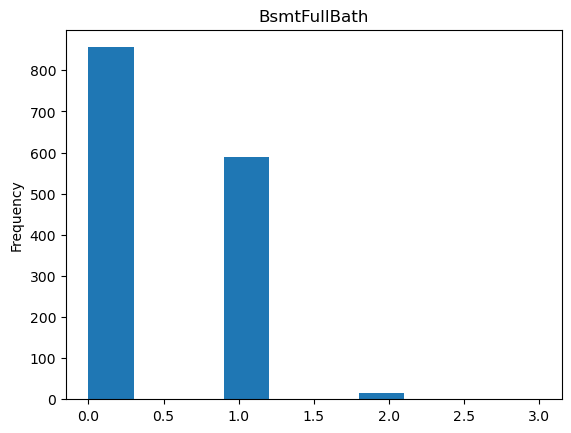

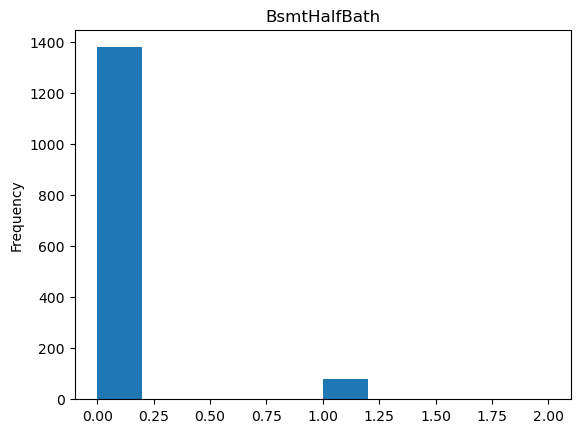

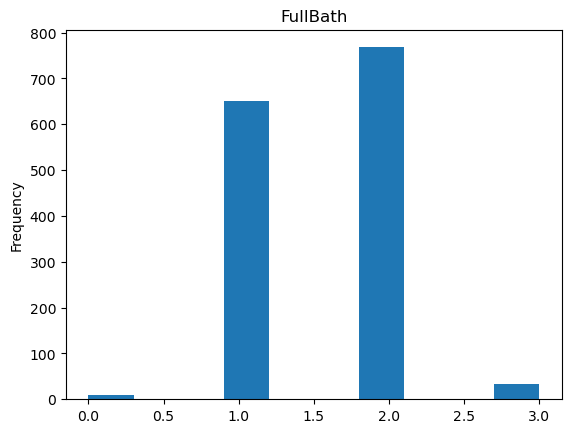

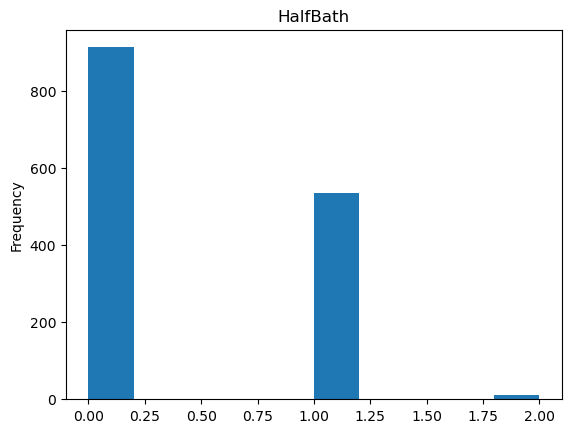

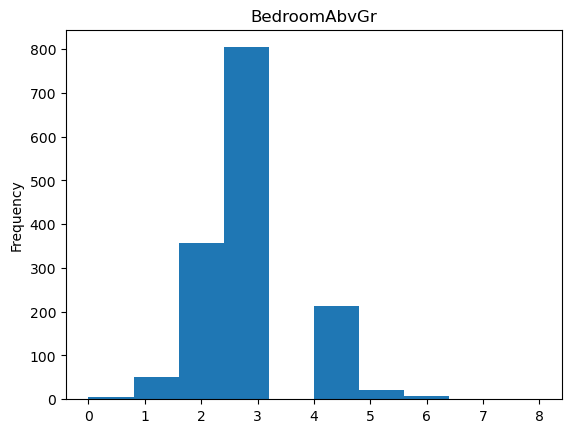

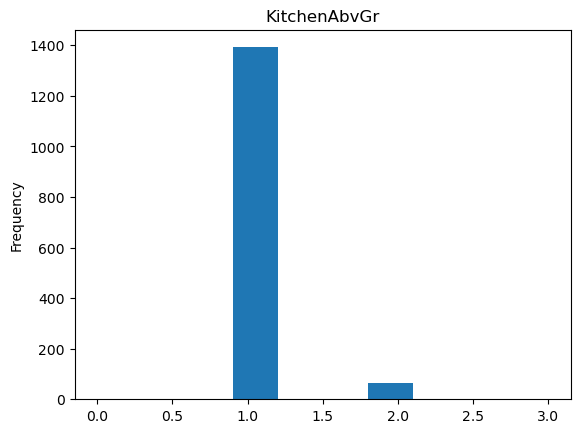

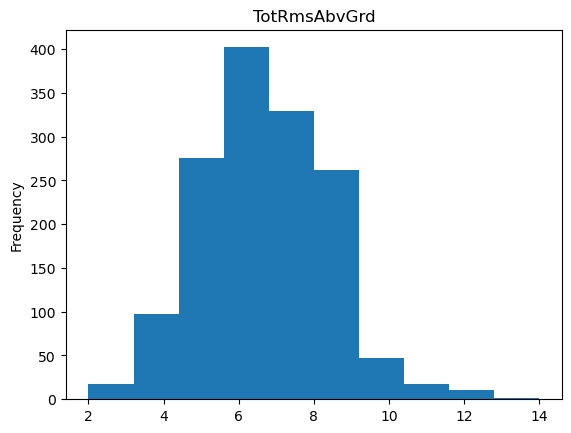

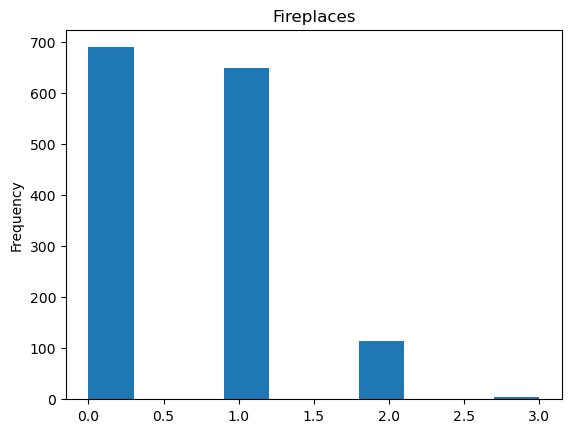

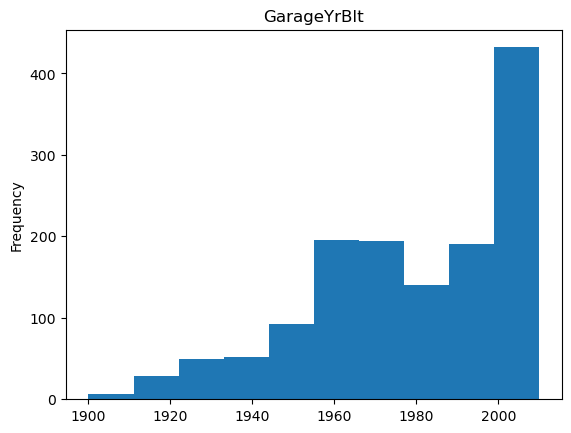

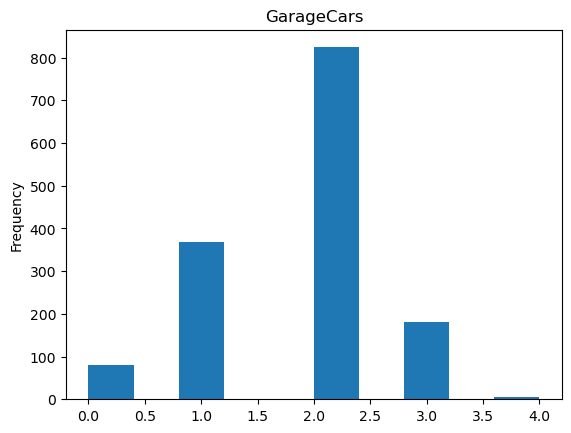

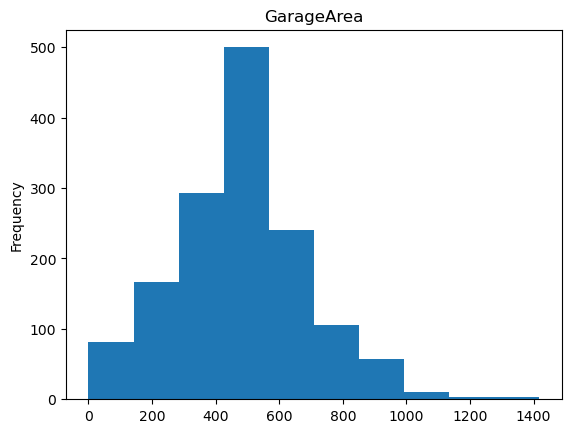

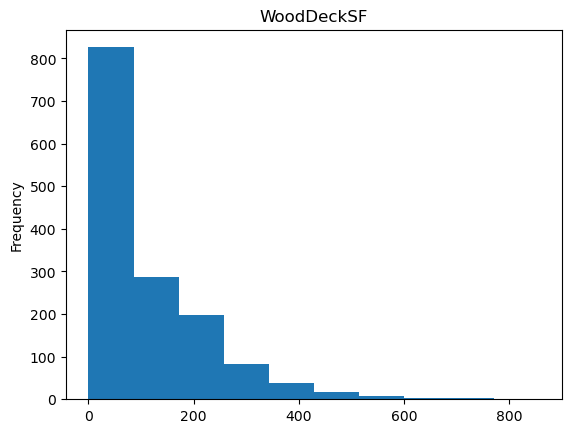

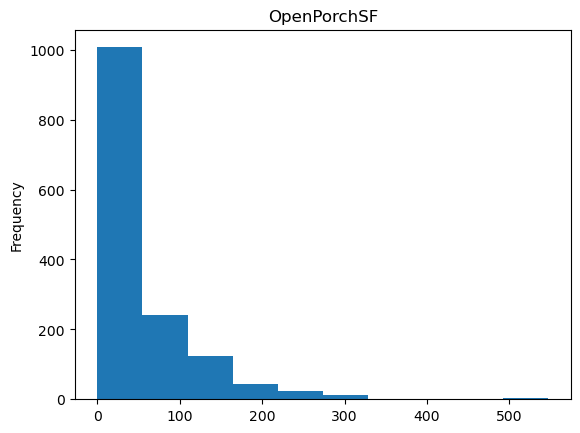

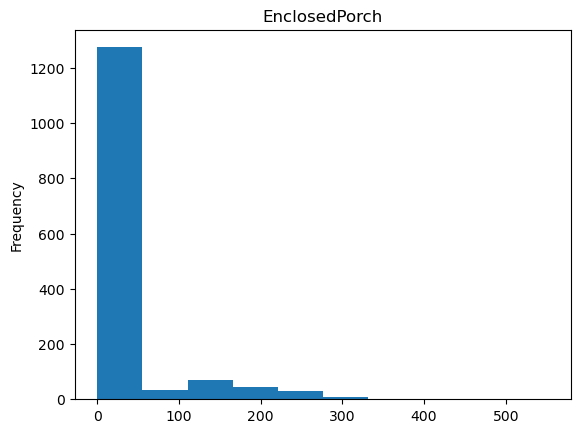

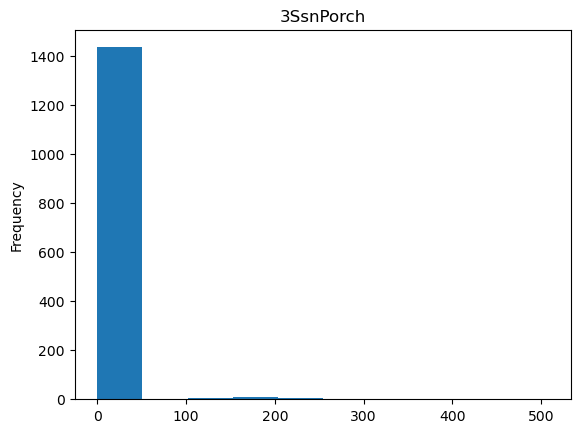

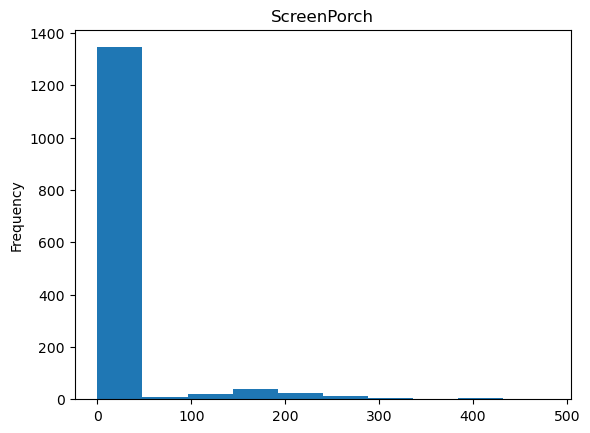

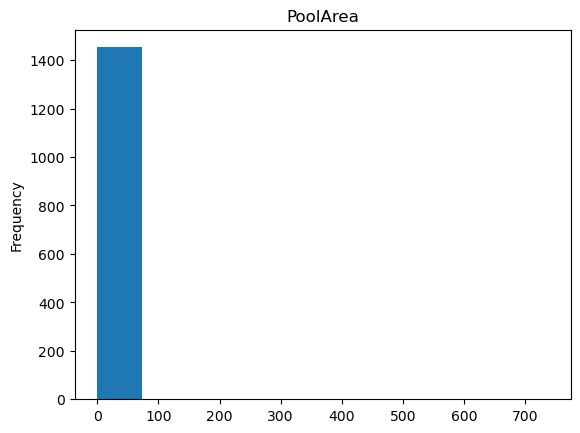

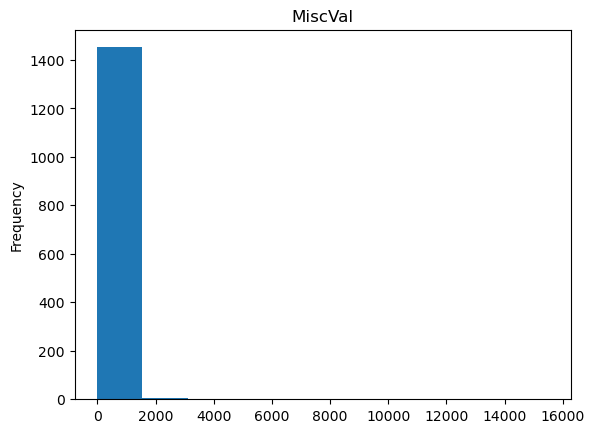

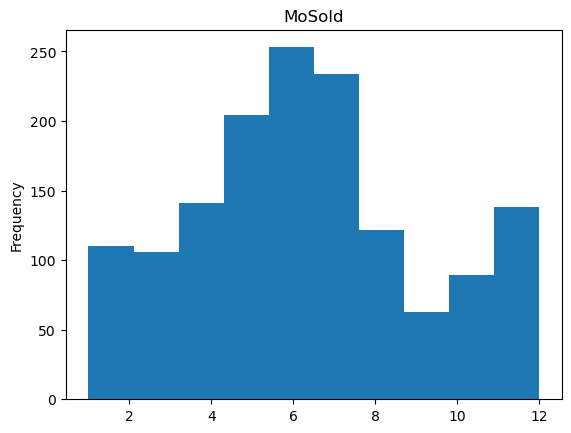

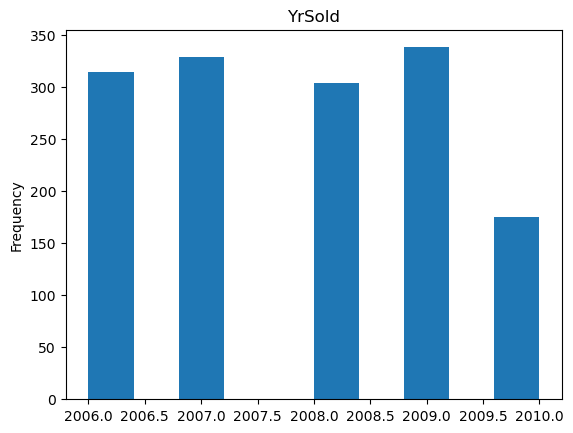

In [23]:
for feat in df_1.columns:
    if df_1[feat].dtype == 'object':
        df_1[feat].value_counts().plot(kind = 'bar', title = feat)
    else:
        df_1[feat].plot(kind = 'hist',title = feat)
    plt.show()

In [24]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 400x400 with 0 Axes>

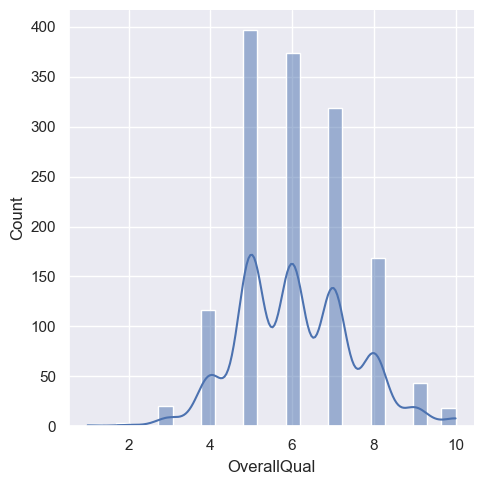

In [25]:
sns.set()
plt.figure(figsize=(4,4))
sns.displot(train_df['OverallQual'],kde = True)
plt.show

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 400x400 with 0 Axes>

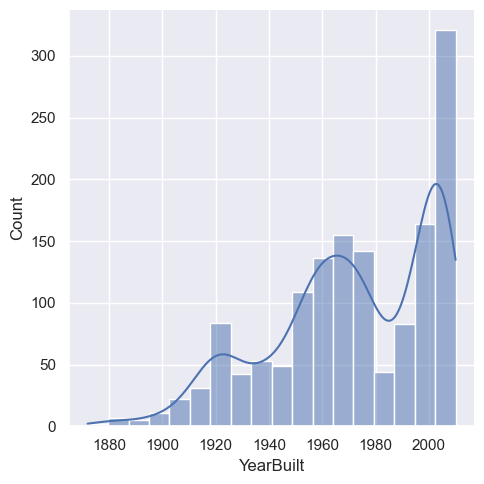

In [26]:
sns.set()
plt.figure(figsize=(4,4))
sns.displot(train_df['YearBuilt'],kde = True)
plt.show

In [27]:
year_data = [x for x in list(num_cols) if x.lower().find('Yr'.lower())!=-1 or x.lower().find('Year'.lower())!=-1]

In [28]:
year_data

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [29]:
year_Data = year_data.copy()

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 400x400 with 0 Axes>

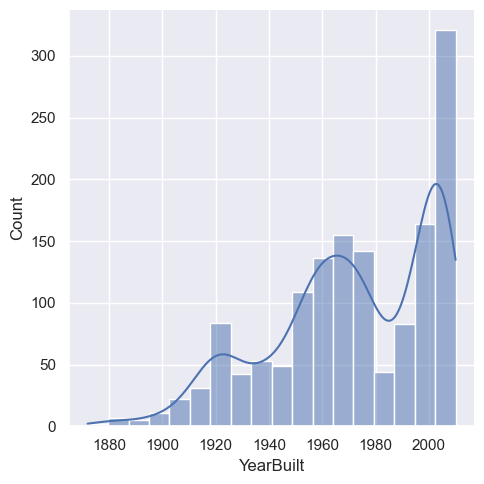

In [30]:
sns.set()
plt.figure(figsize=(4,4))
sns.displot(train_df['YearBuilt'],kde = True)
plt.show


C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 400x400 with 0 Axes>

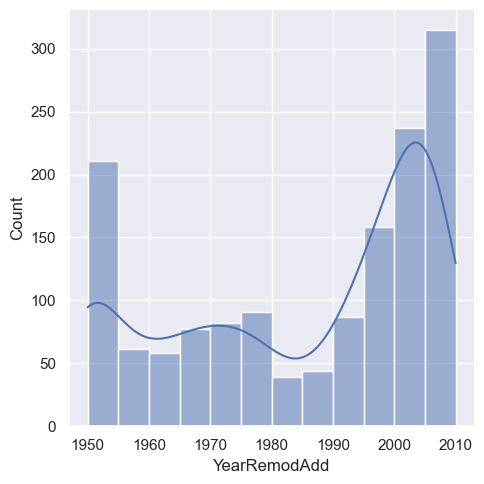

In [31]:
sns.set()
plt.figure(figsize=(4,4))
sns.displot(train_df['YearRemodAdd'],kde = True)
plt.show

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 400x400 with 0 Axes>

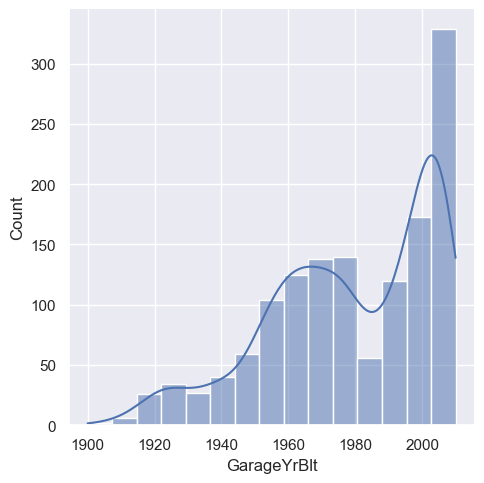

In [32]:
sns.set()
plt.figure(figsize=(4,4))
sns.displot(train_df['GarageYrBlt'],kde = True)
plt.show

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 400x400 with 0 Axes>

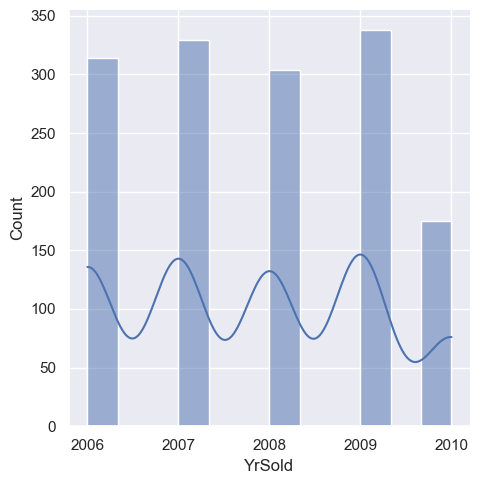

In [33]:

sns.set()
plt.figure(figsize=(4,4))
sns.displot(train_df['YrSold'],kde = True)
plt.show

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

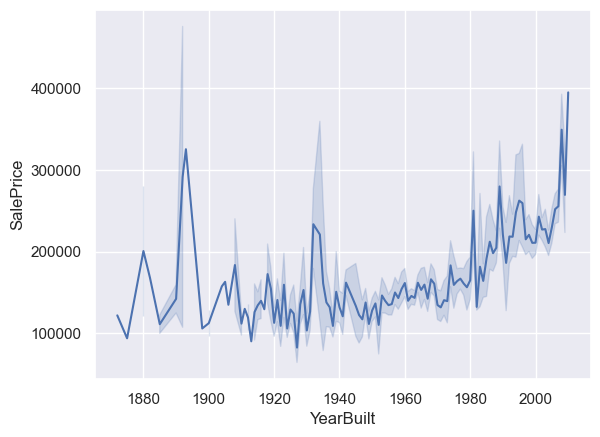

In [34]:
sns.lineplot(x="YearBuilt", y = "SalePrice", data = train_df)

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

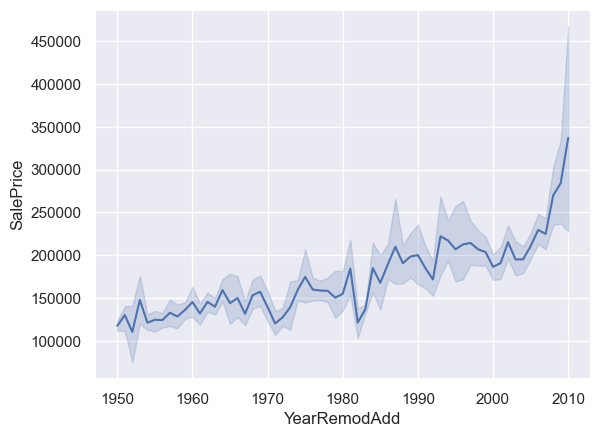

In [35]:
sns.lineplot(x="YearRemodAdd", y = "SalePrice", data = train_df)

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GarageYrBlt', ylabel='SalePrice'>

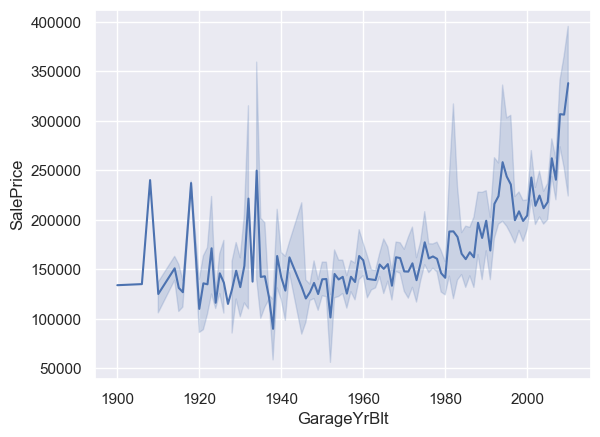

In [36]:
sns.lineplot(x="GarageYrBlt", y = "SalePrice", data = train_df)

In [37]:
corr_matrix=num_cols.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [38]:
num_cols.drop("SalePrice", axis=1).apply(lambda x: x.corr(num_cols.SalePrice))

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
dtype: float64

In [39]:
y = year_Data[:3]

In [40]:
y

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

In [41]:
sold_age = pd.Series(train_df['YrSold'] - train_df['YearBuilt'])    

In [42]:
sold_age = pd.DataFrame(sold_age)

In [43]:
remod_age = pd.Series(train_df['YrSold'] - train_df['YearRemodAdd'])  

In [44]:
remodelled_age = pd.DataFrame(remod_age)

In [45]:
garage_Age = pd.Series(train_df['YrSold'] - train_df['GarageYrBlt'])  

In [46]:
garage_age = pd.DataFrame(garage_Age)

In [47]:
garage_age

,0
0,5.0
1,31.0
2,7.0
3,8.0
4,8.0
...,...
1455,8.0
1456,32.0
1457,69.0
1458,60.0


In [48]:


#fill categorical with other

#for categorical loads of related things are there, find correlation between them and keep only 1 of those



In [49]:
train_df.drop(['Id','Alley', 'MasVnrType', 'FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [51]:
train_df.drop(['YrSold','YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis = 1, inplace = True)

In [52]:
#pd.concat([train_df,garage_age])

In [53]:
train_df['Garage_Age'] = garage_age

In [54]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Garage_Age
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,WD,Normal,208500,5.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,WD,Normal,181500,31.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,WD,Normal,223500,7.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,WD,Abnorml,140000,8.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,WD,Normal,250000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,WD,Normal,175000,8.0
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,WD,Normal,210000,32.0
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,WD,Normal,266500,69.0
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,WD,Normal,142125,60.0


In [55]:
train_df['Remodelled_age'] = remodelled_age

train_df['sold_age'] = sold_age


In [56]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Garage_Age,Remodelled_age,sold_age
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,WD,Normal,208500,5.0,5,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,WD,Normal,181500,31.0,31,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,WD,Normal,223500,7.0,6,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,WD,Abnorml,140000,8.0,36,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,WD,Normal,250000,8.0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,8,WD,Normal,175000,8.0,7,8
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,WD,Normal,210000,32.0,22,32
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2500,5,WD,Normal,266500,69.0,4,69
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,4,WD,Normal,142125,60.0,14,60


In [57]:
#train_df.drop(['YrSold','YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis = 1, inplace = True)

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   int64  
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1201 non-null   float64
 3   LotArea         1460 non-null   int64  
 4   Street          1460 non-null   object 
 5   LotShape        1460 non-null   object 
 6   LandContour     1460 non-null   object 
 7   Utilities       1460 non-null   object 
 8   LotConfig       1460 non-null   object 
 9   LandSlope       1460 non-null   object 
 10  Neighborhood    1460 non-null   object 
 11  Condition1      1460 non-null   object 
 12  Condition2      1460 non-null   object 
 13  BldgType        1460 non-null   object 
 14  HouseStyle      1460 non-null   object 
 15  OverallQual     1460 non-null   int64  
 16  OverallCond     1460 non-null   int64  
 17  RoofStyle       1460 non-null   o

In [59]:
#Outliers

In [60]:
#Selected Numerical features : OverallQual, GrLivArea, GarageCars, TotalBsmtSF, FullBath, sold_age, remodelled_age

In [61]:
num_cols['Garage_Age'] = garage_age
num_cols['Remodelled_age'] = remodelled_age
num_cols['sold_age'] = sold_age

In [62]:
num_cols.drop(['YrSold','YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis = 1, inplace = True)

In [63]:
corr_matrix=num_cols.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
TotRmsAbvGrd      0.533723
MasVnrArea        0.477493
Fireplaces        0.466929
BsmtFinSF1        0.386420
LotFrontage       0.351799
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
LotArea           0.263843
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
BedroomAbvGr      0.168213
ScreenPorch       0.111447
PoolArea          0.092404
MoSold            0.046432
3SsnPorch         0.044584
BsmtFinSF2       -0.011378
BsmtHalfBath     -0.016844
MiscVal          -0.021190
Id               -0.021917
LowQualFinSF     -0.025606
OverallCond      -0.077856
MSSubClass       -0.084284
EnclosedPorch    -0.128578
KitchenAbvGr     -0.135907
Garage_Age       -0.487069
Remodelled_age   -0.509079
sold_age         -0.523350
N

In [64]:
num_cols1 = num_cols.copy

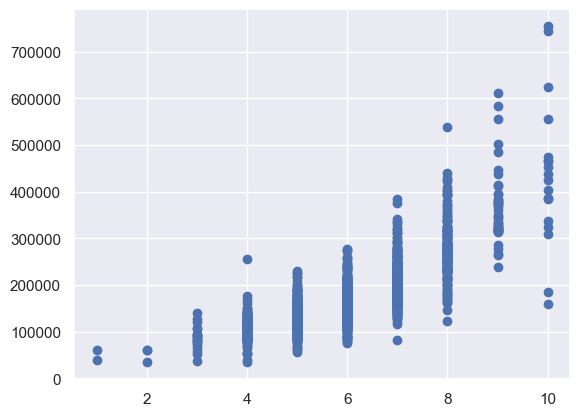

In [65]:
plt.scatter(train_df['OverallQual'], train_df['SalePrice'])

<Axes: xlabel='OverallQual'>

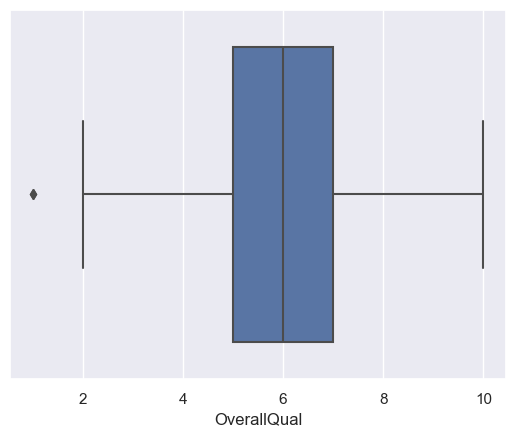

In [66]:
sns.boxplot(x = train_df['OverallQual'])

In [67]:
train_df = train_df[train_df['OverallQual'] > 2]

<Axes: xlabel='OverallQual'>

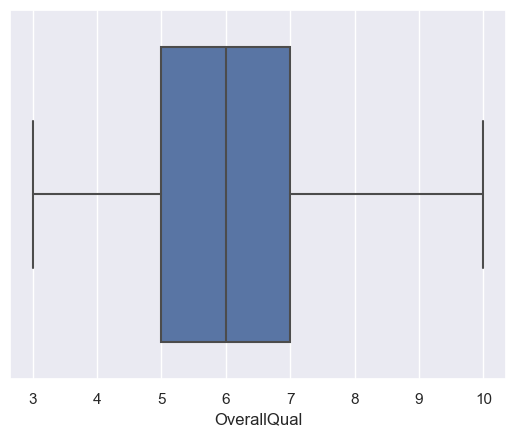

In [68]:
sns.boxplot(x = train_df['OverallQual'])

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


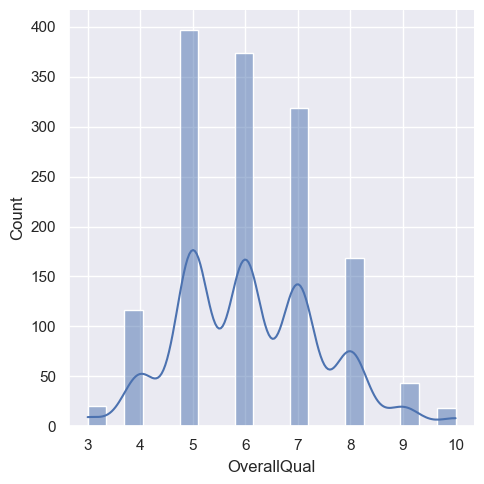

In [69]:
sns.set()
sns.displot(data=train_df, x="OverallQual", kde=True)

In [70]:
oq_log_trans = np.log(train_df['OverallQual'])

In [71]:
train_df['oq_log_trans'] = oq_log_trans

C:\Users\anvesh.singh\AppData\Local\Temp\ipykernel_588\1208126318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['oq_log_trans'] = oq_log_trans


C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


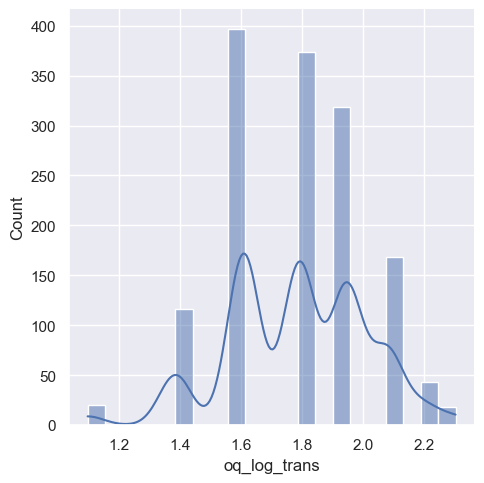

In [72]:
sns.set()
sns.displot(data=train_df, x="oq_log_trans", kde=True)

In [73]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Garage_Age,Remodelled_age,sold_age,oq_log_trans
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,WD,Normal,208500,5.0,5,5,1.945910
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,WD,Normal,181500,31.0,31,31,1.791759
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,WD,Normal,223500,7.0,6,7,1.945910
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,WD,Abnorml,140000,8.0,36,91,1.945910
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,WD,Normal,250000,8.0,8,8,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,WD,Normal,175000,8.0,7,8,1.791759
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,WD,Normal,210000,32.0,22,32,1.791759
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,WD,Normal,266500,69.0,4,69,1.945910
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,WD,Normal,142125,60.0,14,60,1.609438


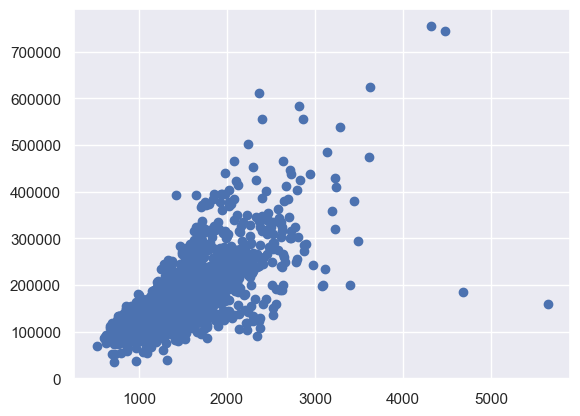

In [74]:
plt.scatter(train_df['GrLivArea'], train_df['SalePrice'])

<Axes: xlabel='GrLivArea'>

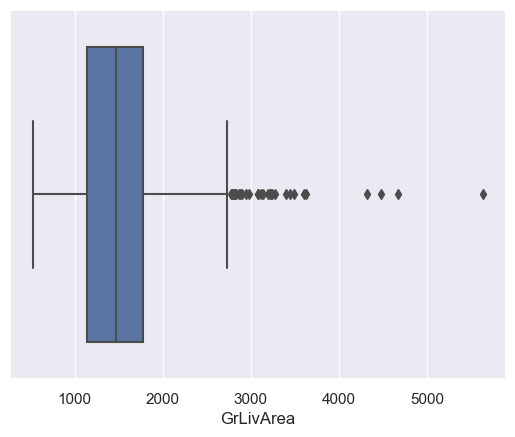

In [75]:
sns.boxplot(x = train_df['GrLivArea'])

In [76]:
train_df = train_df[train_df['GrLivArea'] < 4000 ]

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


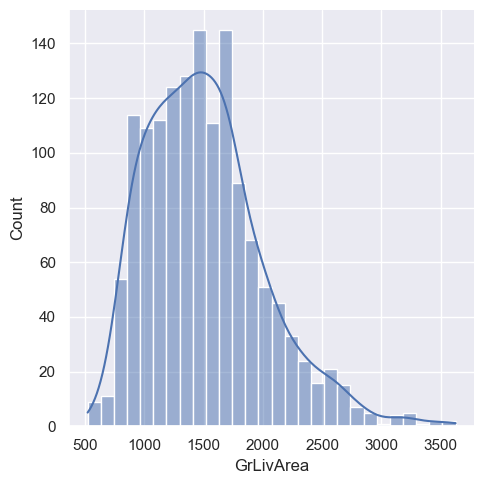

In [77]:
sns.set()
sns.displot(data=train_df, x="GrLivArea", kde=True)

In [78]:
GrLivArea_log_trans = np.log(train_df['GrLivArea'])

In [79]:
train_df['GrLivArea_log_trans'] = GrLivArea_log_trans

C:\Users\anvesh.singh\AppData\Local\Temp\ipykernel_588\2261973043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['GrLivArea_log_trans'] = GrLivArea_log_trans


C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


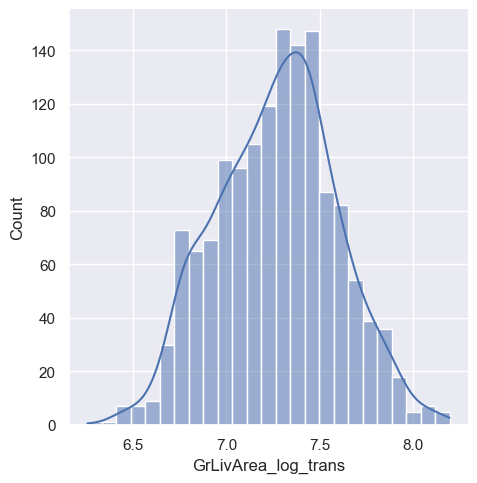

In [80]:
sns.set()
sns.displot(data=train_df, x="GrLivArea_log_trans", kde=True)

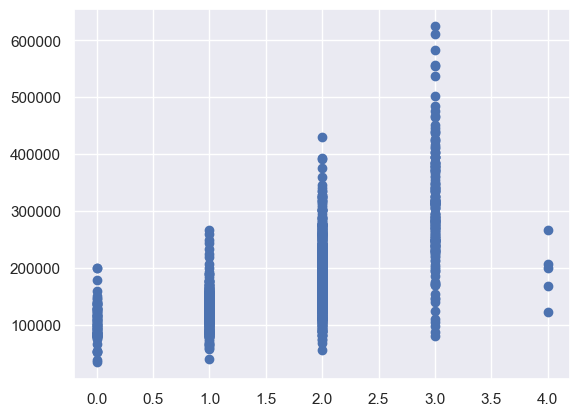

In [81]:
plt.scatter(train_df['GarageCars'], train_df['SalePrice'])

<Axes: xlabel='GarageCars'>

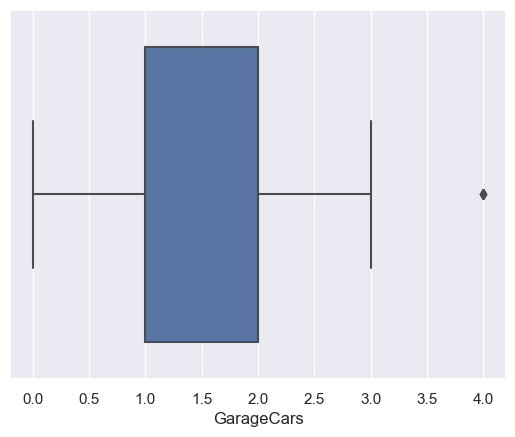

In [82]:
sns.boxplot(x = train_df['GarageCars'])

In [83]:
train_df = train_df[train_df['GarageCars'] < 4 ]

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


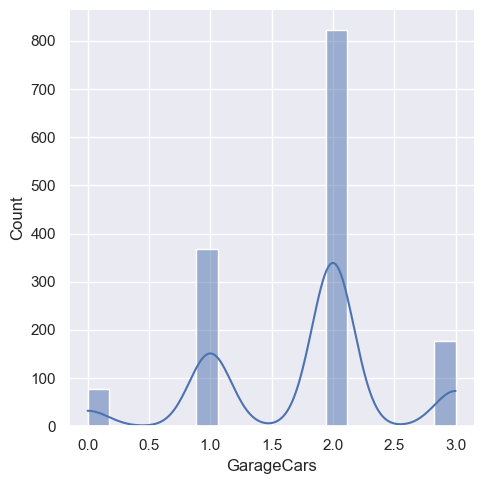

In [84]:
sns.set()
sns.displot(data=train_df, x="GarageCars", kde=True)

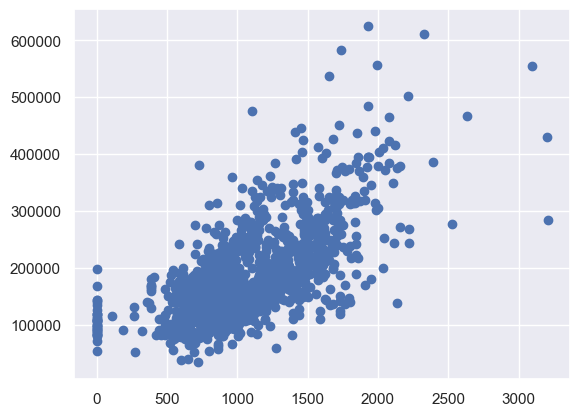

In [85]:
plt.scatter(train_df['TotalBsmtSF'], train_df['SalePrice'])

<Axes: xlabel='TotalBsmtSF'>

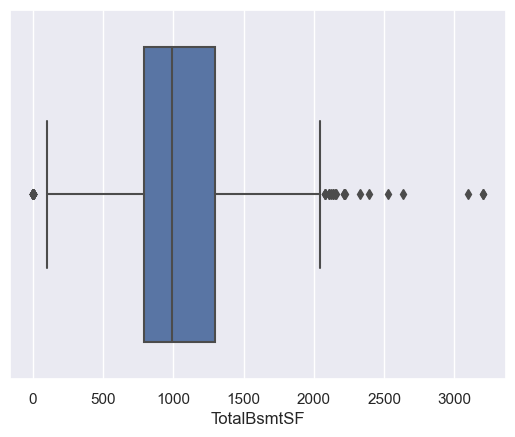

In [86]:
sns.boxplot(x = train_df['TotalBsmtSF'])

In [87]:
train_df = train_df[train_df['TotalBsmtSF'] < 3000]

In [88]:
train_df = train_df[train_df['TotalBsmtSF'] > 0] 

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


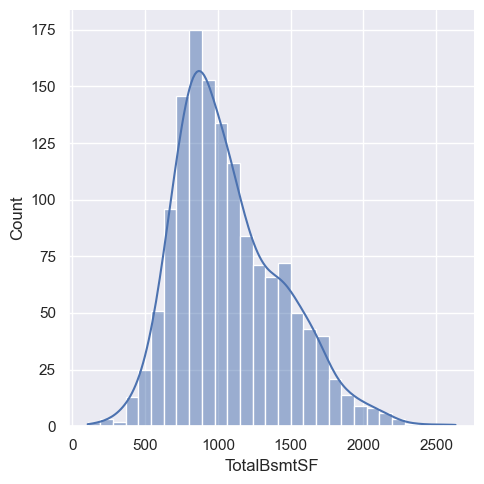

In [89]:
sns.set()
sns.displot(data=train_df, x="TotalBsmtSF", kde=True)

In [90]:
TotalBsmtSF_log_trans = np.log(train_df['TotalBsmtSF'])

In [91]:
train_df['TotalBsmtSF_log_trans'] = TotalBsmtSF_log_trans

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


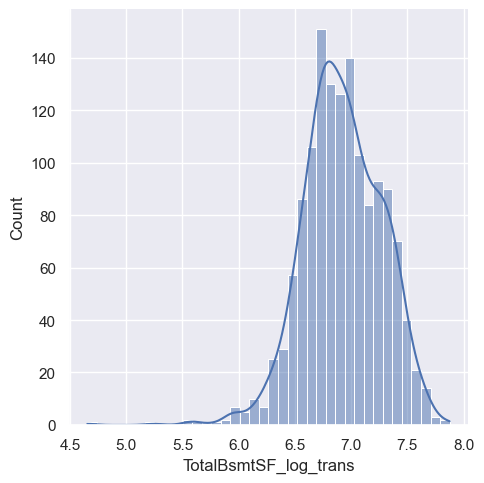

In [92]:
sns.set()
sns.displot(data=train_df, x="TotalBsmtSF_log_trans", kde=True)

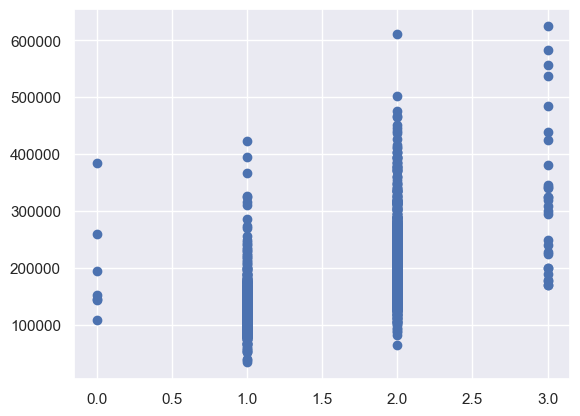

In [93]:

plt.scatter(train_df['FullBath'], train_df['SalePrice'])

<Axes: xlabel='FullBath'>

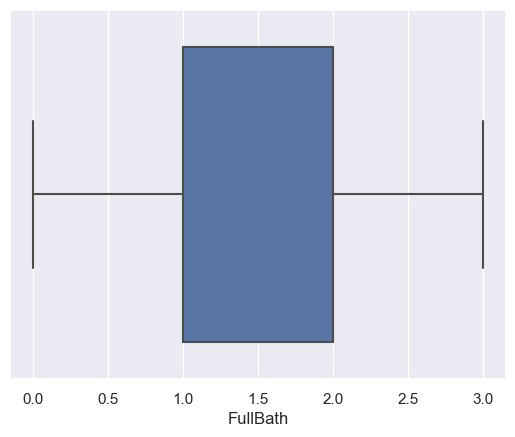

In [94]:
sns.boxplot(x = train_df['FullBath'])

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


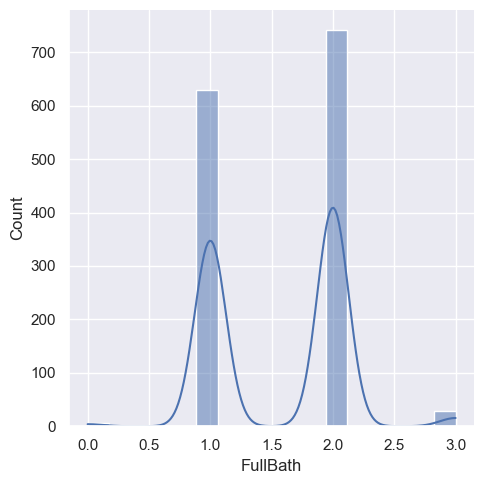

In [95]:
sns.set()
sns.displot(data=train_df, x="FullBath", kde=True)

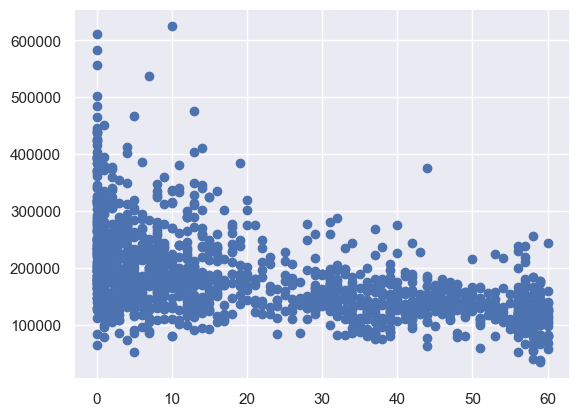

In [96]:

plt.scatter(train_df['Remodelled_age'], train_df['SalePrice'])

<Axes: xlabel='Remodelled_age'>

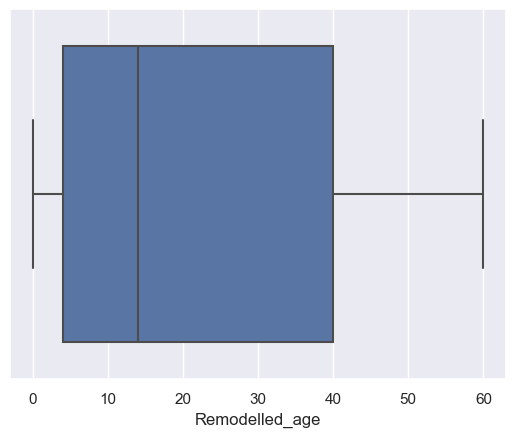

In [97]:
sns.boxplot(x = train_df['Remodelled_age'])

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


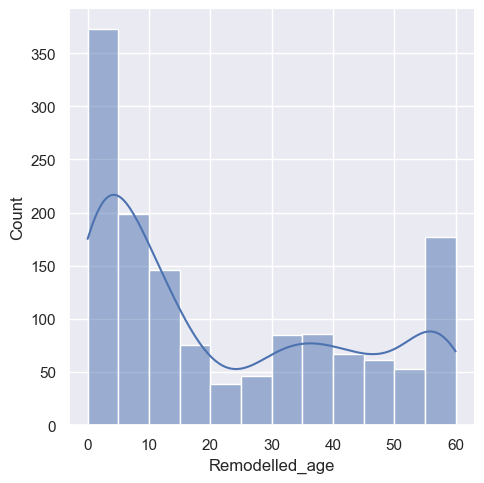

In [98]:
sns.set()
sns.displot(data=train_df, x="Remodelled_age", kde=True)

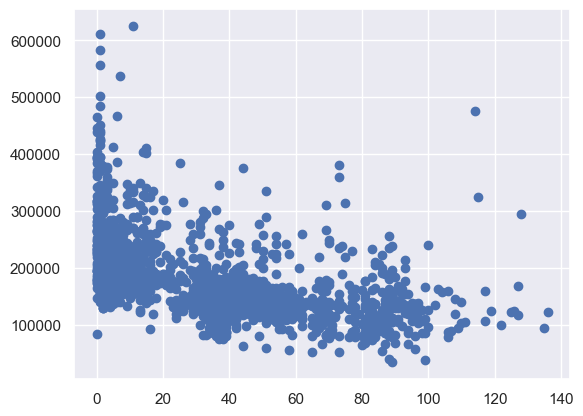

In [99]:

plt.scatter(train_df['sold_age'], train_df['SalePrice'])

<Axes: xlabel='sold_age'>

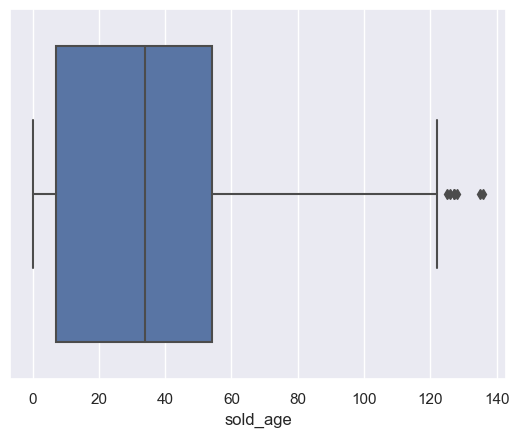

In [100]:
sns.boxplot(x = train_df['sold_age'])

In [101]:
train_df = train_df[train_df['sold_age'] < 120]

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


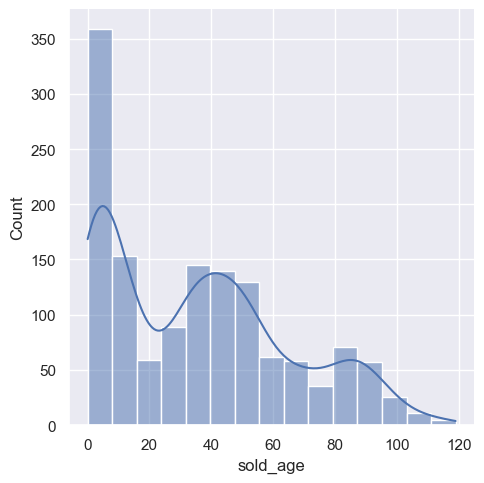

In [102]:
sns.set()
sns.displot(data=train_df, x="sold_age", kde=True)

In [103]:
#train_df['Garage_Age'].fillna(train_df['Garage_Age'].median(),inplace = True)

In [104]:
train_df.isnull().sum()

MSSubClass                 0
MSZoning                   0
LotFrontage              250
LotArea                    0
Street                     0
                        ... 
Remodelled_age             0
sold_age                   0
oq_log_trans               0
GrLivArea_log_trans        0
TotalBsmtSF_log_trans      0
Length: 76, dtype: int64

In [105]:
#apply log normal transformation to each 
#handle categorical variables

In [106]:
#Handeling categorical variables

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


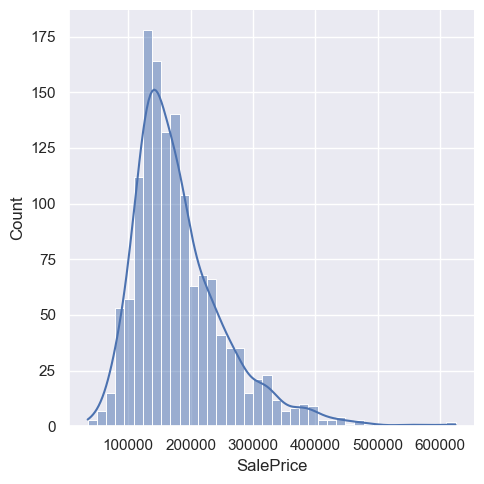

In [107]:
sns.set()
sns.displot(data=train_df, x="SalePrice", kde=True)

<Axes: xlabel='SalePrice'>

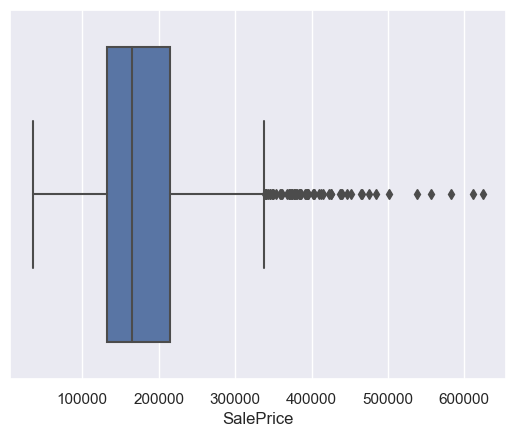

In [108]:
sns.boxplot(x = train_df['SalePrice'])

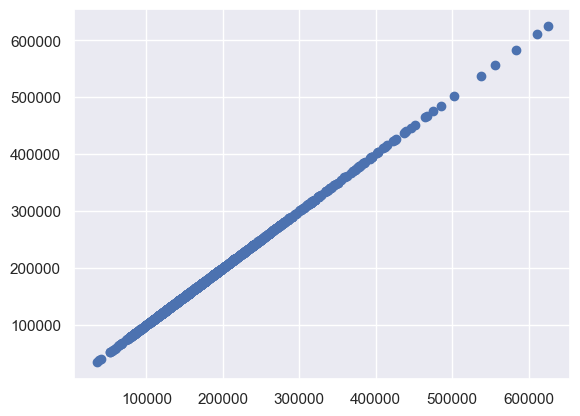

In [109]:
plt.scatter(train_df['SalePrice'], train_df['SalePrice'])

In [110]:
train_df = train_df[train_df['SalePrice']<600000]

In [111]:
SalePrice_log_trans = np.log(train_df['SalePrice'])

In [112]:
train_df['SalePrice_log_trans'] = SalePrice_log_trans

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


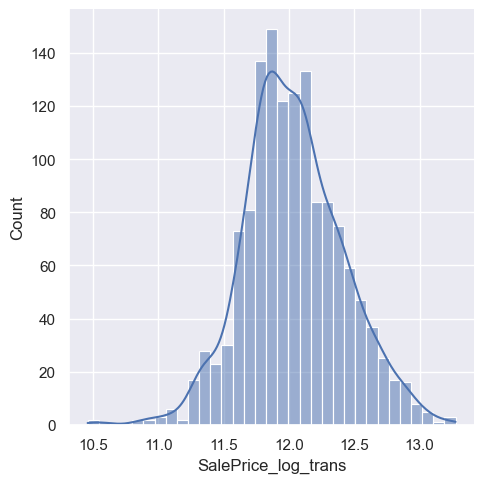

In [113]:
sns.set()
sns.displot(data=train_df, x="SalePrice_log_trans", kde=True)

In [114]:
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [115]:
list(categorical_cols)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [116]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1397 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1397 non-null   int64  
 1   MSZoning               1397 non-null   object 
 2   LotFrontage            1147 non-null   float64
 3   LotArea                1397 non-null   int64  
 4   Street                 1397 non-null   object 
 5   LotShape               1397 non-null   object 
 6   LandContour            1397 non-null   object 
 7   Utilities              1397 non-null   object 
 8   LotConfig              1397 non-null   object 
 9   LandSlope              1397 non-null   object 
 10  Neighborhood           1397 non-null   object 
 11  Condition1             1397 non-null   object 
 12  Condition2             1397 non-null   object 
 13  BldgType               1397 non-null   object 
 14  HouseStyle             1397 non-null   object 
 15  OverallQu

In [117]:
#Chi-squared test
from itertools import product
import os as os
import scipy.stats as ss

In [123]:
categorical_cols.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [124]:
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [125]:
categorical_cols['SaleCondition'] = categorical_cols['SaleCondition'].astype("string")
categorical_cols['MSZoning'] = categorical_cols['MSZoning'].astype("string")
categorical_cols['Street'] = categorical_cols['Street'].astype("string")
categorical_cols['LotShape'] = categorical_cols['LotShape'].astype("string")
categorical_cols['LandContour'] = categorical_cols['LandContour'].astype("string")
categorical_cols['Utilities'] = categorical_cols['Utilities'].astype("string")
categorical_cols['LotConfig'] = categorical_cols['LotConfig'].astype("string")
categorical_cols['LandSlope'] = categorical_cols['LandSlope'].astype("string")
categorical_cols['Neighborhood'] = categorical_cols['Neighborhood'].astype("string")
categorical_cols['Condition1'] = categorical_cols['Condition1'].astype("string")
categorical_cols['Condition2'] = categorical_cols['Condition2'].astype("string")
categorical_cols['BldgType'] = categorical_cols['BldgType'].astype("string")
categorical_cols['HouseStyle'] = categorical_cols['HouseStyle'].astype("string")
categorical_cols['RoofStyle'] = categorical_cols['RoofStyle'].astype("string")
categorical_cols['RoofMatl'] = categorical_cols['RoofMatl'].astype("string")
categorical_cols['Exterior1st'] = categorical_cols['Exterior1st'].astype("string")
categorical_cols['Exterior2nd'] = categorical_cols['Exterior2nd'].astype("string")
#categorical_cols['MasVnrType'] = categorical_cols['MasVnrType'].astype("string")
categorical_cols['ExterQual'] = categorical_cols['ExterQual'].astype("string")
categorical_cols['ExterCond'] = categorical_cols['ExterCond'].astype("string")
categorical_cols['Foundation'] = categorical_cols['Foundation'].astype("string")
categorical_cols['BsmtQual'] = categorical_cols['BsmtQual'].astype("string")
categorical_cols['BsmtCond'] = categorical_cols['BsmtCond'].astype("string")
categorical_cols['BsmtExposure'] = categorical_cols['BsmtExposure'].astype("string")
categorical_cols['BsmtFinType1'] = categorical_cols['BsmtFinType1'].astype("string")
categorical_cols['BsmtFinType2'] = categorical_cols['BsmtFinType2'].astype("string")
categorical_cols['Heating'] = categorical_cols['Heating'].astype("string")
categorical_cols['HeatingQC'] = categorical_cols['HeatingQC'].astype("string")
categorical_cols['CentralAir'] = categorical_cols['CentralAir'].astype("string")
categorical_cols['Electrical'] = categorical_cols['Electrical'].astype("string")
categorical_cols['KitchenQual'] = categorical_cols['KitchenQual'].astype("string")
categorical_cols['Functional'] = categorical_cols['Functional'].astype("string")
categorical_cols['GarageType'] = categorical_cols['GarageType'].astype("string")
categorical_cols['GarageFinish'] = categorical_cols['GarageFinish'].astype("string")
categorical_cols['GarageType'] = categorical_cols['GarageType'].astype("string")
categorical_cols['GarageQual'] = categorical_cols['GarageQual'].astype("string")
categorical_cols['GarageCond'] = categorical_cols['GarageCond'].astype("string")
categorical_cols['PavedDrive'] = categorical_cols['PavedDrive'].astype("string")
categorical_cols['SaleType'] = categorical_cols['SaleType'].astype("string")
categorical_cols['SaleCondition'] = categorical_cols['SaleCondition'].astype("string")





In [126]:
#categorical_cols.drop(['Alley', 'FireplaceQu', 'PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)

In [127]:
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   string
 1   Street         1460 non-null   string
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   string
 4   LandContour    1460 non-null   string
 5   Utilities      1460 non-null   string
 6   LotConfig      1460 non-null   string
 7   LandSlope      1460 non-null   string
 8   Neighborhood   1460 non-null   string
 9   Condition1     1460 non-null   string
 10  Condition2     1460 non-null   string
 11  BldgType       1460 non-null   string
 12  HouseStyle     1460 non-null   string
 13  RoofStyle      1460 non-null   string
 14  RoofMatl       1460 non-null   string
 15  Exterior1st    1460 non-null   string
 16  Exterior2nd    1460 non-null   string
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [128]:
#chi2, p, dof, expected = chi2_contingency(categorical_cols['Neighborhood'])

In [129]:
categorical_cols.drop(['Alley','MasVnrType', 'FireplaceQu', 'PoolQC','Fence', 'MiscFeature'], axis = 1, inplace = True)

In [130]:
#from sklearn.preprocessing import OneHotEncoder

In [131]:
#>>> enc = OneHotEncoder(handle_unknown='ignore')


In [132]:
#enc.fit(categorical_cols['MSZoning'])

In [133]:
#MSZoning_array = np.reshape(categorical_cols['MSZoning'],(730,2))

In [134]:
#enc.fit(categorical_cols['MSZoning_array'])

In [135]:
#enc.fit(MSZoning_array)

In [136]:
#encoded_MSZoning_array=enc.transform(MSZoning_array).toarray()

In [137]:
#categorical_cols['MSZoning_array'] = MSZoning_array

In [138]:
#MSZoning_array1 = np.reshape(encoded_MSZoning_array,(1460,5))

In [139]:
#categorical_cols['MSZoning_array1'] = MSZoning_array1

In [140]:
categorical_cols

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
le = LabelEncoder()

In [143]:
le.fit(categorical_cols['MSZoning'])

LabelEncoder()

In [144]:
MSZoning_trans = le.transform(categorical_cols['MSZoning'])

In [145]:
categorical_cols['MSZoning_trans'] = MSZoning_trans

In [146]:
categorical_cols

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSZoning_trans
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,3
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,3
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,3
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,3
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,3
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal,3
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,3
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,3


In [147]:
categorical_cols.drop(['MSZoning'], axis = 1, inplace = True)

In [148]:
le.fit(categorical_cols['Street'])
Street_trans = le.transform(categorical_cols['Street'])
categorical_cols['Street'] = Street_trans
categorical_cols.drop(['Street'], axis = 1, inplace = True)
categorical_cols['Street_trans'] = Street_trans

In [149]:
le.fit(categorical_cols['LotShape'])
LotShape_trans = le.transform(categorical_cols['LotShape'])
categorical_cols['LotShape'] = LotShape_trans
categorical_cols.drop(['LotShape'], axis = 1, inplace = True)
categorical_cols['LotShape_trans'] = LotShape_trans

In [150]:
le.fit(categorical_cols['LandContour'])
LandContour_trans = le.transform(categorical_cols['LandContour'])
categorical_cols['LandContour'] = LandContour_trans
categorical_cols.drop(['LandContour'], axis = 1, inplace = True)
categorical_cols['LandContour_trans'] = LandContour_trans

In [151]:
le.fit(categorical_cols['Utilities'])
Utilities_trans = le.transform(categorical_cols['Utilities'])
categorical_cols['Utilities'] = Utilities_trans
categorical_cols.drop(['Utilities'], axis = 1, inplace = True)
categorical_cols['Utilities'] = Utilities_trans

In [152]:
list(categorical_cols)

['LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'MSZoning_trans',
 'Street_trans',
 'LotShape_trans',
 'LandContour_trans',
 'Utilities']

In [153]:
le.fit(categorical_cols['LotConfig'])
LotConfig_trans = le.transform(categorical_cols['LotConfig'])
categorical_cols['LotConfig'] = LotConfig_trans
categorical_cols.drop(['LotConfig'], axis = 1, inplace = True)
categorical_cols['LotConfig'] = LotConfig_trans

le.fit(categorical_cols['LandSlope'])
LandSlope_trans = le.transform(categorical_cols['LandSlope'])
categorical_cols['LandSlope'] = LandSlope_trans
categorical_cols.drop(['LandSlope'], axis = 1, inplace = True)
categorical_cols['LandSlope'] = LandSlope_trans

le.fit(categorical_cols['Neighborhood'])
Neighborhood_trans = le.transform(categorical_cols['Neighborhood'])
categorical_cols['Neighborhood'] = Neighborhood_trans
categorical_cols.drop(['Neighborhood'], axis = 1, inplace = True)
categorical_cols['Neighborhood'] = Neighborhood_trans

le.fit(categorical_cols['Condition1'])
Condition1_trans = le.transform(categorical_cols['Condition1'])
categorical_cols['Condition1'] = Condition1_trans
categorical_cols.drop(['Condition1'], axis = 1, inplace = True)
categorical_cols['Condition1'] = Condition1_trans

le.fit(categorical_cols['Condition2'])
Condition2_trans = le.transform(categorical_cols['Condition2'])
categorical_cols['Condition2'] = Condition2_trans
categorical_cols.drop(['Condition2'], axis = 1, inplace = True)
categorical_cols['Condition2'] = Condition2_trans

le.fit(categorical_cols['BldgType'])
BldgType_trans = le.transform(categorical_cols['BldgType'])
categorical_cols['BldgType'] = BldgType_trans
categorical_cols.drop(['BldgType'], axis = 1, inplace = True)
categorical_cols['BldgType'] = BldgType_trans

le.fit(categorical_cols['HouseStyle'])
HouseStyle_trans = le.transform(categorical_cols['HouseStyle'])
categorical_cols['HouseStyle'] = HouseStyle_trans
categorical_cols.drop(['HouseStyle'], axis = 1, inplace = True)
categorical_cols['HouseStyle'] = HouseStyle_trans

le.fit(categorical_cols['RoofStyle'])
RoofStyle_trans = le.transform(categorical_cols['RoofStyle'])
categorical_cols['RoofStyle'] = RoofStyle_trans
categorical_cols.drop(['RoofStyle'], axis = 1, inplace = True)
categorical_cols['RoofStyle'] = RoofStyle_trans

le.fit(categorical_cols['RoofMatl'])
RoofMatl_trans = le.transform(categorical_cols['RoofMatl'])
categorical_cols['RoofMatl'] = RoofMatl_trans
categorical_cols.drop(['RoofMatl'], axis = 1, inplace = True)
categorical_cols['RoofMatl'] = RoofMatl_trans

le.fit(categorical_cols['Exterior1st'])
Exterior1st_trans = le.transform(categorical_cols['Exterior1st'])
categorical_cols['Exterior1st'] = Exterior1st_trans
categorical_cols.drop(['Exterior1st'], axis = 1, inplace = True)
categorical_cols['Exterior1st'] = Exterior1st_trans

le.fit(categorical_cols['Exterior2nd'])
Exterior2nd_trans = le.transform(categorical_cols['Exterior2nd'])
categorical_cols['Exterior2nd'] = Exterior2nd_trans
categorical_cols.drop(['Exterior2nd'], axis = 1, inplace = True)
categorical_cols['Exterior2nd'] = Exterior2nd_trans

le.fit(categorical_cols['ExterQual'])
ExterQual_trans = le.transform(categorical_cols['ExterQual'])
categorical_cols['ExterQual'] = ExterQual_trans
categorical_cols.drop(['ExterQual'], axis = 1, inplace = True)
categorical_cols['ExterQual'] = ExterQual_trans

le.fit(categorical_cols['ExterCond'])
ExterCond_trans = le.transform(categorical_cols['ExterCond'])
categorical_cols['ExterCond'] = ExterCond_trans
categorical_cols.drop(['ExterCond'], axis = 1, inplace = True)
categorical_cols['ExterCond'] = ExterCond_trans

le.fit(categorical_cols['Foundation'])
Foundation_trans = le.transform(categorical_cols['Foundation'])
categorical_cols['Foundation'] = Foundation_trans
categorical_cols.drop(['Foundation'], axis = 1, inplace = True)
categorical_cols['Foundation'] = Foundation_trans

# le.fit(categorical_cols['BsmtQual'])
# BsmtQual_trans = le.transform(categorical_cols['BsmtQual'])
# categorical_cols['BsmtQual'] = BsmtQual_trans
categorical_cols.drop(['BsmtQual'], axis = 1, inplace = True)
# categorical_cols['BsmtQual'] = BsmtQual_trans

# le.fit(categorical_cols['BsmtCond'])
# BsmtCond_trans = le.transform(categorical_cols['BsmtCond'])
# categorical_cols['BsmtCond'] = BsmtCond_trans
categorical_cols.drop(['BsmtCond'], axis = 1, inplace = True)
# categorical_cols['BsmtCond'] = BsmtCond_trans

# le.fit(categorical_cols['BsmtExposure'])
# BsmtExposure_trans = le.transform(categorical_cols['BsmtExposure'])
# categorical_cols['BsmtExposure'] = BsmtExposure_trans
categorical_cols.drop(['BsmtExposure'], axis = 1, inplace = True)
# categorical_cols['BsmtExposure'] = BsmtExposure_trans

# le.fit(categorical_cols['BsmtFinType1'])
# BsmtFinType1_trans = le.transform(categorical_cols['BsmtFinType1'])
# categorical_cols['BsmtFinType1'] = BsmtFinType1_trans
categorical_cols.drop(['BsmtFinType1'], axis = 1, inplace = True)
# categorical_cols['BsmtFinType1'] = BsmtFinType1_trans

# le.fit(categorical_cols['BsmtFinType2'])
# BsmtFinType2_trans = le.transform(categorical_cols['BsmtFinType2'])
# categorical_cols['BsmtFinType2'] = BsmtFinType2_trans
categorical_cols.drop(['BsmtFinType2'], axis = 1, inplace = True)
# categorical_cols['BsmtFinType2'] = BsmtFinType2_trans

le.fit(categorical_cols['Heating'])
Heating_trans = le.transform(categorical_cols['Heating'])
categorical_cols['Heating'] = Heating_trans
categorical_cols.drop(['Heating'], axis = 1, inplace = True)
categorical_cols['Heating'] = Heating_trans

le.fit(categorical_cols['HeatingQC'])
HeatingQC_trans = le.transform(categorical_cols['HeatingQC'])
categorical_cols['HeatingQC'] = HeatingQC_trans
categorical_cols.drop(['HeatingQC'], axis = 1, inplace = True)
categorical_cols['HeatingQC'] = HeatingQC_trans

le.fit(categorical_cols['CentralAir'])
CentralAir_trans = le.transform(categorical_cols['CentralAir'])
categorical_cols['CentralAir'] = CentralAir_trans
categorical_cols.drop(['CentralAir'], axis = 1, inplace = True)
categorical_cols['CentralAir'] = CentralAir_trans

# le.fit(categorical_cols['Electrical'])
# Electrical_trans = le.transform(categorical_cols['Electrical'])
# categorical_cols['Electrical'] = Electrical_trans
categorical_cols.drop(['Electrical'], axis = 1, inplace = True)
# categorical_cols['Electrical'] = Electrical_trans

le.fit(categorical_cols['KitchenQual'])
KitchenQual_trans = le.transform(categorical_cols['KitchenQual'])
categorical_cols['KitchenQual'] = KitchenQual_trans
categorical_cols.drop(['KitchenQual'], axis = 1, inplace = True)
categorical_cols['KitchenQual'] = KitchenQual_trans

le.fit(categorical_cols['Functional'])
Functional_trans = le.transform(categorical_cols['Functional'])
categorical_cols['Functional'] = Functional_trans
categorical_cols.drop(['Functional'], axis = 1, inplace = True)
categorical_cols['Functional'] = Functional_trans

# le.fit(categorical_cols['GarageType'])
# GarageType_trans = le.transform(categorical_cols['GarageType'])
# categorical_cols['GarageType'] = GarageType_trans
categorical_cols.drop(['GarageType'], axis = 1, inplace = True)
# categorical_cols['GarageType'] = GarageType_trans

# le.fit(categorical_cols['GarageFinish'])
# GarageFinish_trans = le.transform(categorical_cols['GarageFinish'])
# categorical_cols['GarageFinish'] = GarageFinish_trans
categorical_cols.drop(['GarageFinish'], axis = 1, inplace = True)
# categorical_cols['GarageFinish'] = GarageFinish_trans

# le.fit(categorical_cols['GarageQual'])
# GarageQual_trans = le.transform(categorical_cols['GarageQual'])
# categorical_cols['GarageQual'] = GarageQual_trans
categorical_cols.drop(['GarageQual'], axis = 1, inplace = True)
# categorical_cols['GarageQual'] = GarageQual_trans

# le.fit(categorical_cols['GarageFinish'])
# GarageFinish_trans = le.transform(categorical_cols['GarageFinish'])
# categorical_cols['GarageFinish'] = GarageFinish_trans
categorical_cols.drop(['GarageFinish'], axis = 1, inplace = True)
# categorical_cols['GarageFinish'] = GarageFinish_trans

# le.fit(categorical_cols['GarageCond'])
# GarageCond_trans = le.transform(categorical_cols['GarageCond'])
# categorical_cols['GarageCond'] = GarageCond_trans
categorical_cols.drop(['GarageCond'], axis = 1, inplace = True)
# categorical_cols['GarageCond'] = GarageCond_trans

le.fit(categorical_cols['PavedDrive'])
PavedDrive_trans = le.transform(categorical_cols['PavedDrive'])
categorical_cols['PavedDrive'] = PavedDrive_trans
categorical_cols.drop(['PavedDrive'], axis = 1, inplace = True)
categorical_cols['PavedDrive'] = PavedDrive_trans

le.fit(categorical_cols['SaleType'])
SaleType_trans = le.transform(categorical_cols['SaleType'])
categorical_cols['SaleType'] = SaleType_trans
categorical_cols.drop(['SaleType'], axis = 1, inplace = True)
categorical_cols['SaleType'] = SaleType_trans

le.fit(categorical_cols['SaleCondition'])
SaleCondition_trans = le.transform(categorical_cols['SaleCondition'])
categorical_cols['SaleCondition'] = SaleCondition_trans
categorical_cols.drop(['SaleCondition'], axis = 1, inplace = True)
categorical_cols['SaleCondition'] = SaleCondition_trans






KeyError: "['GarageFinish'] not found in axis"

In [154]:
categorical_cols.head()

,GarageCond,PavedDrive,SaleType,SaleCondition,MSZoning_trans,Street_trans,LotShape_trans,LandContour_trans,Utilities,LotConfig,...,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional
0,TA,Y,WD,Normal,3,1,3,3,0,4,...,12,13,2,4,2,1,0,1,2,6
1,TA,Y,WD,Normal,3,1,3,3,0,2,...,8,8,3,4,1,1,0,1,3,6
2,TA,Y,WD,Normal,3,1,0,3,0,4,...,12,13,2,4,2,1,0,1,2,6
3,TA,Y,WD,Abnorml,3,1,0,3,0,0,...,13,15,3,4,0,1,2,1,2,6
4,TA,Y,WD,Normal,3,1,0,3,0,2,...,12,13,2,4,2,1,0,1,2,6


In [155]:
categorical_cols.drop(['GarageCond'], axis = 1, inplace = True)


In [156]:
categorical_cols.head()

,PavedDrive,SaleType,SaleCondition,MSZoning_trans,Street_trans,LotShape_trans,LandContour_trans,Utilities,LotConfig,LandSlope,...,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional
0,Y,WD,Normal,3,1,3,3,0,4,0,...,12,13,2,4,2,1,0,1,2,6
1,Y,WD,Normal,3,1,3,3,0,2,0,...,8,8,3,4,1,1,0,1,3,6
2,Y,WD,Normal,3,1,0,3,0,4,0,...,12,13,2,4,2,1,0,1,2,6
3,Y,WD,Abnorml,3,1,0,3,0,0,0,...,13,15,3,4,0,1,2,1,2,6
4,Y,WD,Normal,3,1,0,3,0,2,0,...,12,13,2,4,2,1,0,1,2,6


In [157]:
categorical_cols['SalePrice'] = train_df['SalePrice']

In [158]:
categorical_cols.head()

,PavedDrive,SaleType,SaleCondition,MSZoning_trans,Street_trans,LotShape_trans,LandContour_trans,Utilities,LotConfig,LandSlope,...,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,SalePrice
0,Y,WD,Normal,3,1,3,3,0,4,0,...,13,2,4,2,1,0,1,2,6,208500.0
1,Y,WD,Normal,3,1,3,3,0,2,0,...,8,3,4,1,1,0,1,3,6,181500.0
2,Y,WD,Normal,3,1,0,3,0,4,0,...,13,2,4,2,1,0,1,2,6,223500.0
3,Y,WD,Abnorml,3,1,0,3,0,0,0,...,15,3,4,0,1,2,1,2,6,140000.0
4,Y,WD,Normal,3,1,0,3,0,2,0,...,13,2,4,2,1,0,1,2,6,250000.0


In [159]:
corr_matrix=categorical_cols.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

ValueError: could not convert string to float: 'Y'

In [ ]:
#KitchenQual        
#ExterQual


In [160]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1397 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1397 non-null   int64  
 1   MSZoning               1397 non-null   object 
 2   LotFrontage            1147 non-null   float64
 3   LotArea                1397 non-null   int64  
 4   Street                 1397 non-null   object 
 5   LotShape               1397 non-null   object 
 6   LandContour            1397 non-null   object 
 7   Utilities              1397 non-null   object 
 8   LotConfig              1397 non-null   object 
 9   LandSlope              1397 non-null   object 
 10  Neighborhood           1397 non-null   object 
 11  Condition1             1397 non-null   object 
 12  Condition2             1397 non-null   object 
 13  BldgType               1397 non-null   object 
 14  HouseStyle             1397 non-null   object 
 15  OverallQu

In [161]:
categorical_cols['SalePrice_log'] = train_df['SalePrice_log_trans']

In [162]:
corr_matrix=categorical_cols.corr()
corr_matrix["SalePrice_log"].sort_values(ascending=False)

ValueError: could not convert string to float: 'Y'

In [ ]:
#train_df = train_df[['',]]


<Axes: xlabel='ExterQual'>

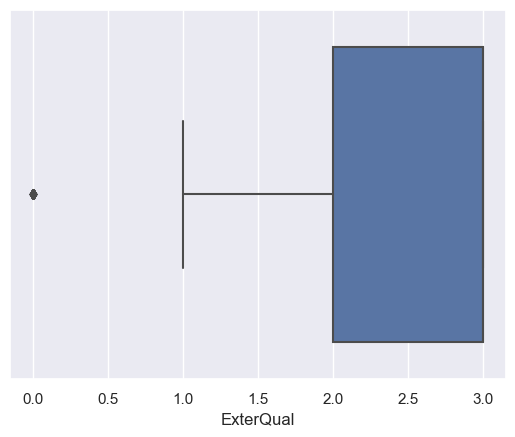

In [163]:
sns.boxplot(x = categorical_cols['ExterQual'])

<Axes: xlabel='KitchenQual'>

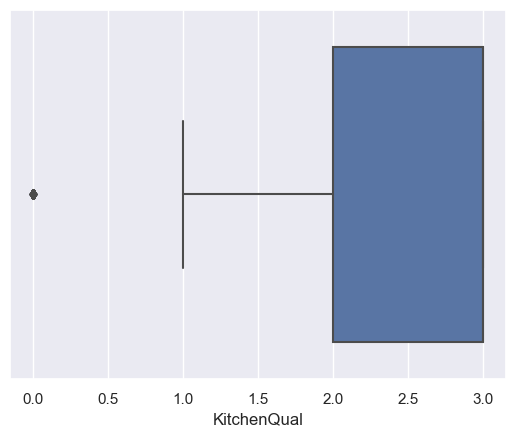

In [164]:
sns.boxplot(x = categorical_cols['KitchenQual'])

In [165]:
le.fit(train_df['ExterQual'])
ExterQual_trans = le.transform(train_df['ExterQual'])
train_df['ExterQual'] = ExterQual_trans
train_df.drop(['ExterQual'], axis = 1, inplace = True)
train_df['ExterQual'] = ExterQual_trans

le.fit(train_df['KitchenQual'])
KitchenQual_trans = le.transform(train_df['KitchenQual'])
train_df['KitchenQual'] = KitchenQual_trans
train_df.drop(['KitchenQual'], axis = 1, inplace = True)
train_df['KitchenQual'] = KitchenQual_trans


In [166]:
train_df = train_df[train_df['ExterQual'] > 0]
train_df = train_df[train_df['KitchenQual'] > 0]

In [167]:
train_df = train_df[['ExterQual','KitchenQual','Garage_Age','Remodelled_age','sold_age','oq_log_trans','GrLivArea_log_trans','TotalBsmtSF_log_trans','SalePrice_log_trans']]
# 70  Garage_Age             1327 non-null   float64
#  71  Remodelled_age         1397 non-null   int64  
#  72  sold_age               1397 non-null   int64  
#  73  oq_log_trans           1397 non-null   float64
#  74  GrLivArea_log_trans    1397 non-null   float64
#  75  TotalBsmtSF_log_trans  1397 non-null   float64
#  76  SalePrice_log_trans

In [168]:
train_df

,ExterQual,KitchenQual,Garage_Age,Remodelled_age,sold_age,oq_log_trans,GrLivArea_log_trans,TotalBsmtSF_log_trans,SalePrice_log_trans
0,2,2,5.0,5,5,1.945910,7.444249,6.752270,12.247694
1,3,3,31.0,31,31,1.791759,7.140453,7.140453,12.109011
2,2,2,7.0,6,7,1.945910,7.487734,6.824374,12.317167
3,3,2,8.0,36,91,1.945910,7.448334,6.628041,11.849398
4,2,2,8.0,8,8,2.079442,7.695303,7.043160,12.429216
...,...,...,...,...,...,...,...,...,...
1454,2,2,5.0,4,5,1.945910,7.107425,7.107425,12.128111
1455,3,3,8.0,7,8,1.791759,7.406711,6.859615,12.072541
1456,3,3,32.0,22,32,1.791759,7.636752,7.340836,12.254863
1458,3,2,60.0,14,60,1.609438,6.982863,6.982863,11.864462


In [169]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1294 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ExterQual              1294 non-null   int32  
 1   KitchenQual            1294 non-null   int32  
 2   Garage_Age             1226 non-null   float64
 3   Remodelled_age         1294 non-null   int64  
 4   sold_age               1294 non-null   int64  
 5   oq_log_trans           1294 non-null   float64
 6   GrLivArea_log_trans    1294 non-null   float64
 7   TotalBsmtSF_log_trans  1294 non-null   float64
 8   SalePrice_log_trans    1294 non-null   float64
dtypes: float64(5), int32(2), int64(2)
memory usage: 91.0 KB


In [170]:
train_df["Garage_Age"].fillna(train_df["Garage_Age"].median(),inplace = True)

In [171]:
X = train_df.iloc [ : , : -1]
y = train_df.iloc [ : ,-1]

In [172]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 0)

In [173]:
from sklearn.metrics import r2_score


In [174]:
X_train.drop(['actual'], axis = 1, inplace = True)


KeyError: "['actual'] not found in axis"

In [247]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
linear_reg_predict = lin_reg.predict(X_test)
r2_score(y_true = y_test, y_pred = linear_reg_predict)
# mse = MSE(y_true=y_test,y_pred=linear_reg_predict)
# rmse = MSE(y_true=y_test,y_pred=linear_reg_predict,squared = False) 


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- difference
- lr_prediction
- y_test_df


In [176]:
dt_regressor = DecisionTreeRegressor(random_state = 2)
dt_regressor.fit(X_train, y_train)
dt_reg_pred = dt_regressor.predict(X_test)
r2_score(y_true = y_test, y_pred = dt_reg_pred)

0.5518306192854225

In [254]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
r2_score(y_true = y_test, y_pred = rf_pred)
# mse = MSE(y_true=y_test,y_pred=rf_pred) 
# print(mse)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- difference
- lr_prediction
- y_test_df


In [178]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train,y_train)
svr_reg_predict = svr_reg.predict(X_test)
r2_score(y_true = y_test, y_pred = svr_reg_predict)

0.43238484298781543

In [179]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
r2_score(y_true = y_test, y_pred = xgb_pred)

0.6950013650421922

In [180]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
adaboost_reg_pred = regr.predict(X_test)
r2_score(y_true = y_test, y_pred =adaboost_reg_pred )

0.6685261225963195

In [ ]:
# Linear Regression and Random Forest

In [ ]:
# Linear Regression model description

In [181]:
lin_reg.coef_

array([ 0.01769164, -0.02300399,  0.00063007, -0.00222723, -0.00279828,
        0.47329028,  0.44903442,  0.21509974])

In [182]:
lin_reg.intercept_

6.565033581868046

In [183]:
X_test.head()

,ExterQual,KitchenQual,Garage_Age,Remodelled_age,sold_age,oq_log_trans,GrLivArea_log_trans,TotalBsmtSF_log_trans
750,3,3,30.0,6,100,1.386294,7.038784,6.356108
534,2,2,2.0,2,2,2.079442,7.254178,6.561031
1417,2,2,11.0,11,11,2.079442,7.803843,7.157735
267,3,2,69.0,11,69,1.609438,7.692570,6.579251
763,2,2,10.0,10,10,2.079442,7.768533,7.132498


In [184]:
lin_reg.predict(np.array([[3,3,30.0,6,100,1.386294,7.038784,6.356108]]))

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.45878002])

In [185]:
y_test.head()

750     11.477298
534     12.089539
1417    12.736701
267     12.097930
763     12.727838
Name: SalePrice_log_trans, dtype: float64

In [186]:
11.477298 - 11.45878002

0.0185179799999986

In [187]:
lin_reg.predict(np.array([[2,2,2.0,2,2,2.079442,7.254178,6.561031]]))

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.19844938])

In [188]:
12.19844938- 12.089539

0.10891037999999931

In [189]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 259 entries, 750 to 717
Series name: SalePrice_log_trans
Non-Null Count  Dtype  
--------------  -----  
259 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [190]:
y_test_df = pd.DataFrame(y_test)

In [191]:
X_test['y_test_df'] = y_test_df

In [192]:
lr_predict_df = pd.DataFrame(linear_reg_predict)

In [193]:
X_test['lr_predict_df'] = lr_predict_df

In [194]:
X_test['differnce'] = X_test['lr_predict_df'] - X_test['y_test_df'] 

In [195]:
X_test

,ExterQual,KitchenQual,Garage_Age,Remodelled_age,sold_age,oq_log_trans,GrLivArea_log_trans,TotalBsmtSF_log_trans,y_test_df,lr_predict_df,differnce
750,3,3,30.0,6,100,1.386294,7.038784,6.356108,11.477298,NaN,NaN
534,2,2,2.0,2,2,2.079442,7.254178,6.561031,12.089539,NaN,NaN
1417,2,2,11.0,11,11,2.079442,7.803843,7.157735,12.736701,NaN,NaN
267,3,2,69.0,11,69,1.609438,7.692570,6.579251,12.097930,NaN,NaN
763,2,2,10.0,10,10,2.079442,7.768533,7.132498,12.727838,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1085,3,2,18.0,18,18,1.791759,6.903747,6.841615,11.898188,NaN,NaN
49,3,3,41.0,41,41,1.609438,6.861711,6.861711,11.751942,12.25525,0.503308
1195,3,2,3.0,3,3,1.791759,7.283448,6.590301,12.078239,NaN,NaN
863,3,3,50.0,50,50,1.609438,7.045777,7.045777,11.794338,NaN,NaN


In [196]:
lr_predict_df

,0
0,11.458780
1,12.198449
2,12.534060
3,12.029150
4,12.517171
...,...
254,11.912655
255,11.687712
256,12.095028
257,11.770397


In [197]:
y_test_df

,SalePrice_log_trans
750,11.477298
534,12.089539
1417,12.736701
267,12.097930
763,12.727838
...,...
1085,11.898188
49,11.751942
1195,12.078239
863,11.794338


In [198]:
y_test_df.reset_index(inplace = True, drop = True)


In [199]:
y_test_df

,SalePrice_log_trans
0,11.477298
1,12.089539
2,12.736701
3,12.097930
4,12.727838
...,...
254,11.898188
255,11.751942
256,12.078239
257,11.794338


In [200]:
X_test.drop(['lr_predict_df'], axis = 1, inplace = True)
X_test.drop(['differnce'], axis = 1, inplace = True)


In [201]:
X_test

,ExterQual,KitchenQual,Garage_Age,Remodelled_age,sold_age,oq_log_trans,GrLivArea_log_trans,TotalBsmtSF_log_trans,y_test_df
750,3,3,30.0,6,100,1.386294,7.038784,6.356108,11.477298
534,2,2,2.0,2,2,2.079442,7.254178,6.561031,12.089539
1417,2,2,11.0,11,11,2.079442,7.803843,7.157735,12.736701
267,3,2,69.0,11,69,1.609438,7.692570,6.579251,12.097930
763,2,2,10.0,10,10,2.079442,7.768533,7.132498,12.727838
...,...,...,...,...,...,...,...,...,...
1085,3,2,18.0,18,18,1.791759,6.903747,6.841615,11.898188
49,3,3,41.0,41,41,1.609438,6.861711,6.861711,11.751942
1195,3,2,3.0,3,3,1.791759,7.283448,6.590301,12.078239
863,3,3,50.0,50,50,1.609438,7.045777,7.045777,11.794338


In [240]:
#X_test.drop(['lr_pred'], axis = 1, inplace = True)


In [203]:
X_test

,ExterQual,KitchenQual,Garage_Age,Remodelled_age,sold_age,oq_log_trans,GrLivArea_log_trans,TotalBsmtSF_log_trans,y_test_df
750,3,3,30.0,6,100,1.386294,7.038784,6.356108,11.477298
534,2,2,2.0,2,2,2.079442,7.254178,6.561031,12.089539
1417,2,2,11.0,11,11,2.079442,7.803843,7.157735,12.736701
267,3,2,69.0,11,69,1.609438,7.692570,6.579251,12.097930
763,2,2,10.0,10,10,2.079442,7.768533,7.132498,12.727838
...,...,...,...,...,...,...,...,...,...
1085,3,2,18.0,18,18,1.791759,6.903747,6.841615,11.898188
49,3,3,41.0,41,41,1.609438,6.861711,6.861711,11.751942
1195,3,2,3.0,3,3,1.791759,7.283448,6.590301,12.078239
863,3,3,50.0,50,50,1.609438,7.045777,7.045777,11.794338


In [204]:
X_test.reset_index(inplace=True, drop = True)

In [205]:
X_test

,ExterQual,KitchenQual,Garage_Age,Remodelled_age,sold_age,oq_log_trans,GrLivArea_log_trans,TotalBsmtSF_log_trans,y_test_df
0,3,3,30.0,6,100,1.386294,7.038784,6.356108,11.477298
1,2,2,2.0,2,2,2.079442,7.254178,6.561031,12.089539
2,2,2,11.0,11,11,2.079442,7.803843,7.157735,12.736701
3,3,2,69.0,11,69,1.609438,7.692570,6.579251,12.097930
4,2,2,10.0,10,10,2.079442,7.768533,7.132498,12.727838
...,...,...,...,...,...,...,...,...,...
254,3,2,18.0,18,18,1.791759,6.903747,6.841615,11.898188
255,3,3,41.0,41,41,1.609438,6.861711,6.861711,11.751942
256,3,2,3.0,3,3,1.791759,7.283448,6.590301,12.078239
257,3,3,50.0,50,50,1.609438,7.045777,7.045777,11.794338


In [206]:
X_test['lr_prediction'] = lr_predict_df

In [207]:
X_test['difference'] = X_test['y_test_df'] - X_test['lr_prediction']

In [208]:
X_test

,ExterQual,KitchenQual,Garage_Age,Remodelled_age,sold_age,oq_log_trans,GrLivArea_log_trans,TotalBsmtSF_log_trans,y_test_df,lr_prediction,difference
0,3,3,30.0,6,100,1.386294,7.038784,6.356108,11.477298,11.458780,0.018518
1,2,2,2.0,2,2,2.079442,7.254178,6.561031,12.089539,12.198449,-0.108910
2,2,2,11.0,11,11,2.079442,7.803843,7.157735,12.736701,12.534060,0.202641
3,3,2,69.0,11,69,1.609438,7.692570,6.579251,12.097930,12.029150,0.068781
4,2,2,10.0,10,10,2.079442,7.768533,7.132498,12.727838,12.517171,0.210667
...,...,...,...,...,...,...,...,...,...,...,...
254,3,2,18.0,18,18,1.791759,6.903747,6.841615,11.898188,11.912655,-0.014467
255,3,3,41.0,41,41,1.609438,6.861711,6.861711,11.751942,11.687712,0.064231
256,3,2,3.0,3,3,1.791759,7.283448,6.590301,12.078239,12.095028,-0.016788
257,3,3,50.0,50,50,1.609438,7.045777,7.045777,11.794338,11.770397,0.023941


In [209]:
X_test['difference'].mean()

0.006618173884692262

In [210]:
X_test['difference'].median()

0.019127687651211644

In [211]:
X_test.drop(['y_test_df','lr_prediction','difference'], axis = 1, inplace = True)


In [212]:
X_test['y_test_df'] = y_test_df
X_test['lr_prediction'] = lr_predict_df
X_test['difference'] = abs(X_test['y_test_df'] - X_test['lr_prediction'])

In [213]:
X_test

,ExterQual,KitchenQual,Garage_Age,Remodelled_age,sold_age,oq_log_trans,GrLivArea_log_trans,TotalBsmtSF_log_trans,y_test_df,lr_prediction,difference
0,3,3,30.0,6,100,1.386294,7.038784,6.356108,11.477298,11.458780,0.018518
1,2,2,2.0,2,2,2.079442,7.254178,6.561031,12.089539,12.198449,0.108910
2,2,2,11.0,11,11,2.079442,7.803843,7.157735,12.736701,12.534060,0.202641
3,3,2,69.0,11,69,1.609438,7.692570,6.579251,12.097930,12.029150,0.068781
4,2,2,10.0,10,10,2.079442,7.768533,7.132498,12.727838,12.517171,0.210667
...,...,...,...,...,...,...,...,...,...,...,...
254,3,2,18.0,18,18,1.791759,6.903747,6.841615,11.898188,11.912655,0.014467
255,3,3,41.0,41,41,1.609438,6.861711,6.861711,11.751942,11.687712,0.064231
256,3,2,3.0,3,3,1.791759,7.283448,6.590301,12.078239,12.095028,0.016788
257,3,3,50.0,50,50,1.609438,7.045777,7.045777,11.794338,11.770397,0.023941


In [214]:
X_test['difference'].median()

0.0889318211279786

In [215]:
X_test['difference'].mean()

0.11894042463552884

In [216]:
print(X_test['difference'].min())
print(X_test['difference'].max())

0.0003593479320773696
0.7529281055001835


In [ ]:
# #Linear Regression error values
# mse -> 0.026417940263980685
# rmse -> 0.16253596606284001

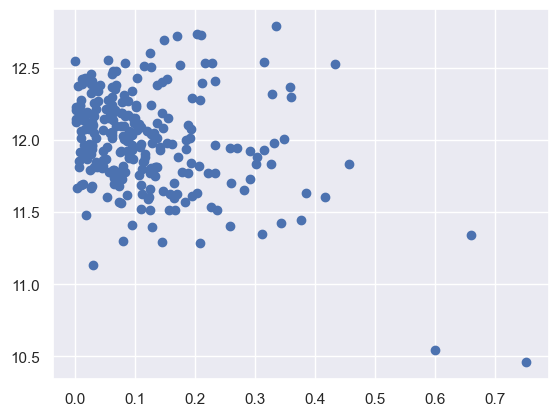

In [217]:
plt.scatter(X_test['difference'], y_test)

In [ ]:
# Random Forest regressor
# mse -> 0.026196849954548677

In [ ]:
#Hyperparameter tuning and model study

C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anvesh.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


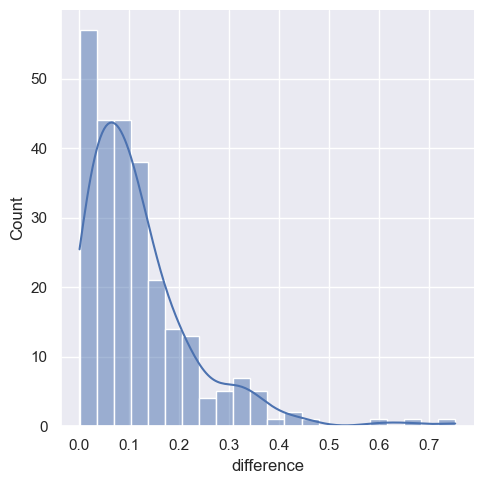

In [218]:
sns.set()
sns.displot(data=X_test, x="difference", kde=True)

In [220]:
importance = lin_reg.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' %(i,v))

Feature: 0, Score: 0.01769
Feature: 1, Score: -0.02300
Feature: 2, Score: 0.00063
Feature: 3, Score: -0.00223
Feature: 4, Score: -0.00280
Feature: 5, Score: 0.47329
Feature: 6, Score: 0.44903
Feature: 7, Score: 0.21510


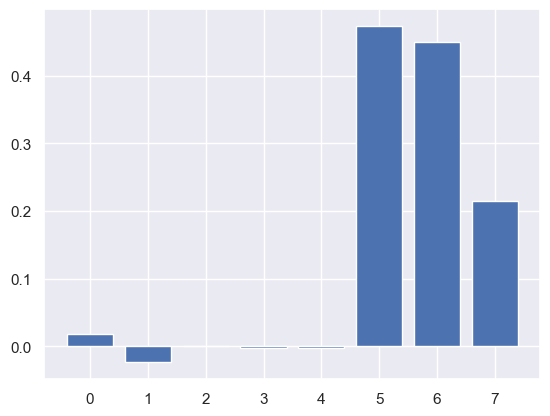

In [222]:
from matplotlib import pyplot
pyplot.bar([x for x in range (len(importance))],importance)
pyplot.show()

In [223]:
train_df1 = train_df.copy()

In [225]:
train_df1.drop('Garage_Age',axis=1,inplace=True)

In [226]:
train_df1

,ExterQual,KitchenQual,Remodelled_age,sold_age,oq_log_trans,GrLivArea_log_trans,TotalBsmtSF_log_trans,SalePrice_log_trans
0,2,2,5,5,1.945910,7.444249,6.752270,12.247694
1,3,3,31,31,1.791759,7.140453,7.140453,12.109011
2,2,2,6,7,1.945910,7.487734,6.824374,12.317167
3,3,2,36,91,1.945910,7.448334,6.628041,11.849398
4,2,2,8,8,2.079442,7.695303,7.043160,12.429216
...,...,...,...,...,...,...,...,...
1454,2,2,4,5,1.945910,7.107425,7.107425,12.128111
1455,3,3,7,8,1.791759,7.406711,6.859615,12.072541
1456,3,3,22,32,1.791759,7.636752,7.340836,12.254863
1458,3,2,14,60,1.609438,6.982863,6.982863,11.864462


In [227]:
X1 = train_df1.iloc [ : , : -1]
y1 = train_df1.iloc [ : ,-1]

In [228]:
X1_train, X1_test, y1_train, y1_test = train_test_split (X1,y1, test_size = 0.2, random_state = 0)

In [234]:
lin_reg = LinearRegression()
lin_reg.fit(X1_train,y1_train)
linear_reg_predict1 = lin_reg.predict(X1_test)
r2_score(y_true = y1_test, y_pred = linear_reg_predict1)
mse1 = MSE(y_true=y1_test,y_pred=linear_reg_predict1)
print(mse1)
# rmse = MSE(y_true=y_test,y_pred=linear_reg_predict,squared = False) 

0.026819067894646078


In [236]:
# coefficients for random forest

In [238]:
importance1 = rf.feature_importances_
for i,v in enumerate(importance1):
    print('Feature: 0%d, Score: %.5f' %(i,v))

Feature: 00, Score: 0.00417
Feature: 01, Score: 0.00623
Feature: 02, Score: 0.02909
Feature: 03, Score: 0.03934
Feature: 04, Score: 0.08843
Feature: 05, Score: 0.49301
Feature: 06, Score: 0.21769
Feature: 07, Score: 0.12203


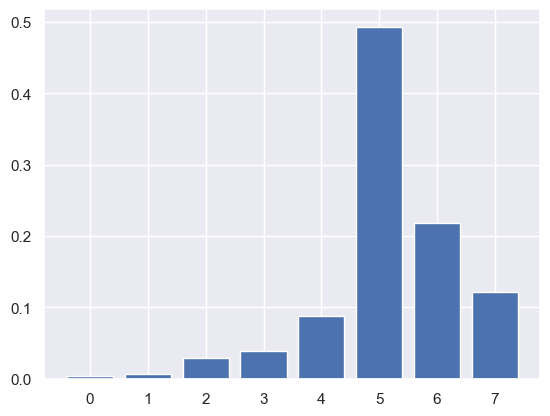

In [239]:
pyplot.bar([x for x in range (len(importance1))],importance1)
pyplot.show()

In [253]:
rf_exp = RandomForestRegressor(n_estimators = 1000, random_state = 100)
rf_exp.fit(X1_train,y1_train)
rf_exp_pred = rf_exp.predict(X1_test)
r2_score(y_true = y1_test, y_pred = rf_exp_pred)
#mse = MSE(y_true=y_test,y_pred=rf_pred) 
#print(mse)

0.7742243513443223